## IMDB DATA

What´s the most popular films of Science-Fiction in the IMDB site? Which films have the best user ratings? Is there a difference between user and critic ratings? Which directors and production companies have the best reviews? Which genres have the most volatile ratings? These are some of the questions that will be analyzed here with data taken from IMDB.


IMDB is the largestst online database of information about films, TV series, podcasts, video games, and streaming content. Founded in the 1990s and now a subsidiary of Amazon, the site offers details on cast, crew, plots, trivia, trailers, reviews, and opinions from a global community of fans, who can also create their own lists of favorite titles.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# csv files path

imdb_data_path = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/imdb_data.xlsx'
runtime_path = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/runtime.xlsx'

# pickle files path

imdb_data_pkl_path = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/imdb_data.pkl'
runtime__pkl_path = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/runtime.pkl'

In [4]:
imdb_data = pd.read_excel(imdb_data_path)
runtime_data = pd.read_excel(runtime_path)

#### IMDB movies data

In [6]:
display(imdb_data)

,Name,Year,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025.0,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1,Jurassic World: Rebirth,2025.0,6.0,50.0,"Dinosaur Adventure, Action, Adventure, Sci-Fi,...",Cast & crew,PG-13,112000.0,Gareth Edwards,"['Universal Pictures', 'Amblin Entertainment',..."
2,War of the Worlds,2025.0,2.6,6.0,"Alien Invasion, Horror, Sci-Fi, Thriller",Cast & crew,PG-13,23000.0,Rich Lee,"['Universal Pictures', 'Bazelevs Entertainment..."
3,The Life of Chuck,2024.0,7.4,67.0,"Drama, Fantasy, Sci-Fi",Cast & crew,R,22000.0,Mike Flanagan,"['Neon', 'Intrepid Pictures', 'Red Room Pictur..."
4,Descendent,2025.0,4.9,NaN,"Drama, Horror, Mystery, Sci-Fi, Thriller",Cast & crew,NaN,588.0,Peter Cilella,['Rustic Films']
...,...,...,...,...,...,...,...,...,...,...
3794,The Dead Link,2002.0,7.2,NaN,Sci-Fi,Cast & crew,NaN,58.0,Ben Juhl,['Twilightshow Entertainment']
3795,Uchuujin from Outer Space,2007.0,5.5,NaN,"Sitcom, Comedy, Sci-Fi",Cast & crew,NaN,85.0,Danny Mann Jr.,"[""Don't Give A Damn Productions"", 'Troma Enter..."
3796,The Complex,2012.0,5.5,NaN,"Comedy, Horror, Sci-Fi",Cast & crew,NaN,57.0,Josh Spiegel,NaN
3797,Epitaph: Bread and Salt,2013.0,4.4,NaN,"Action, Horror, Sci-Fi",Cast & crew,NaN,81.0,Nathyn Masters,['TimeCode Mechanics']


In [7]:
# repeated lines in IMDB data?

duplic = imdb_data.value_counts()
duplic = duplic[duplic > 1]  
duplic_titles = duplic.index.tolist()

print(len(duplic_titles))

0


In [8]:
# repeated titles?

duplic_ = imdb_data['Name'].value_counts()
duplic_ = duplic_[duplic_ > 1]  
duplic_titles = duplic_.index.tolist()

print(duplic_titles)
print(len(duplic_titles))

['Dr. Jekyll and Mr. Hyde', 'Superman', 'Frankenstein', 'Journey to the Center of the Earth', 'Mars', 'The Avengers', 'The Whisperer in Darkness', 'The Arrival', 'Meteor', 'End of the World', 'Captain America', 'Blake of Scotland Yard', 'The Hive', 'Firestarter', "It's Alive", 'Black Friday', 'Project X', 'Alien Predator', 'The Sighting', 'The Lost World', 'Chrysalis', 'Flatliners', 'Prism', 'The Thing', 'Savage', 'The Survivalist', 'Hellboy', 'Ghostbusters', 'The Time Machine', 'Buck Rogers', 'Paradox', 'Parallel', 'Air', 'RoboCop', 'Alien Abduction', 'Oblivion', '20,000 Leagues Under the Sea', 'Invasion of the Body Snatchers', 'Pandemic', 'Mortal Kombat', 'Interface', 'Not of This Earth', 'The Silencers', 'The Stepford Wives', 'Mysterious Island', 'The Black Hole', 'Invaders from Mars', 'The Day the Earth Stood Still', 'Unidentified', 'The Invisible Man', 'Planet of the Apes', 'Death House', 'Lilo & Stitch', 'The Nutty Professor', 'Spiders', "The Brain That Wouldn't Die", 'The Fly', 

There are 75 titles repeated

In [10]:
# why exist repeated titles? example with 'Superman' movie. I checked for others repeated titles.

superman = imdb_data[imdb_data['Name']=='Superman']
display(superman)

# different 'Superman' movies - the 2025, 1973 and 1948 movies - has the same title in the dataframe

,Name,Year,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025.0,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1269,Superman,1948.0,6.7,NaN,"Superhero, Action, Sci-Fi",Cast & crew,Approved,1.3,Spencer Gordon Bennet,['Sam Katzman Productions']
2486,Superman,1973.0,6.4,NaN,"Superhero, Action, Adventure, Sci-Fi",Cast & crew,NaN,224.0,Robert Leslie Bellem,['Warner Bros.']


In [11]:
# rename the column 'Name'

imdb_data = imdb_data.rename(columns = {'Name':'title'})
imdb_data.columns

Index(['title', 'Year', 'User Rating', 'Critic Rating', 'Genres', 'Duration',
       'Age Rating', 'Popularity', 'Director', 'Production Companies'],
      dtype='object')

In [12]:
# whats the line of 'Pandemic' movie? both films has the same duration, what may induce confusion.

pandemic_line = imdb_data[imdb_data['title'] =='Pandemic']
display(pandemic_line)

# there are two different movies

,title,Year,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
1345,Pandemic,2016.0,4.4,47.0,"B-Action, B-Horror, Action, Horror, Sci-Fi, Th...",Cast & crew,TV-MA,8.7,John Suits,"['New Artists Alliance', 'Tadross Media Group'..."
2118,Pandemic,2009.0,3.4,NaN,"Conspiracy Thriller, Drama, Sci-Fi, Thriller",Cast & crew,R,918.0,Jason Connery,"['Alianza Films International', 'Hollywood Pho..."


In [13]:
imdb_data.dtypes

title                    object
Year                    float64
User Rating             float64
Critic Rating           float64
Genres                   object
Duration                 object
Age Rating               object
Popularity              float64
Director                 object
Production Companies     object
dtype: object

In [14]:
# year as integer

imdb_data["Year"] = imdb_data["Year"].astype("Int64")   

In [15]:
imdb_data.dtypes

title                    object
Year                      Int64
User Rating             float64
Critic Rating           float64
Genres                   object
Duration                 object
Age Rating               object
Popularity              float64
Director                 object
Production Companies     object
dtype: object

In [16]:
imdb_data.head(5)

,title,Year,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1,Jurassic World: Rebirth,2025,6.0,50.0,"Dinosaur Adventure, Action, Adventure, Sci-Fi,...",Cast & crew,PG-13,112000.0,Gareth Edwards,"['Universal Pictures', 'Amblin Entertainment',..."
2,War of the Worlds,2025,2.6,6.0,"Alien Invasion, Horror, Sci-Fi, Thriller",Cast & crew,PG-13,23000.0,Rich Lee,"['Universal Pictures', 'Bazelevs Entertainment..."
3,The Life of Chuck,2024,7.4,67.0,"Drama, Fantasy, Sci-Fi",Cast & crew,R,22000.0,Mike Flanagan,"['Neon', 'Intrepid Pictures', 'Red Room Pictur..."
4,Descendent,2025,4.9,NaN,"Drama, Horror, Mystery, Sci-Fi, Thriller",Cast & crew,NaN,588.0,Peter Cilella,['Rustic Films']


In [17]:
# i will create a new column with all the titles, but the repeated titles will be followed by the year. Its a way to distinguish between movies with
# the same title.

imdb_data1 = imdb_data.copy()
counts = imdb_data1["title"].value_counts(dropna=False)

def adjust_title(row):
    title = row["title"]
    year = row["Year"]
    if pd.isna(title):   # if has no title, keep as NaN
        return title
    if counts[title] > 1:
        return f"{title} {int(year)}" if pd.notna(year) else title
    else:
        return title

imdb_data1["title_adjusted"] = imdb_data1.apply(adjust_title, axis=1)

In [18]:
# reordering the columns

imdb_data1 = imdb_data1[['title','Year','title_adjusted','User Rating','Critic Rating','Genres','Duration','Age Rating','Popularity','Director','Production Companies']]
display(imdb_data1)

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025,Superman 2025,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1,Jurassic World: Rebirth,2025,Jurassic World: Rebirth,6.0,50.0,"Dinosaur Adventure, Action, Adventure, Sci-Fi,...",Cast & crew,PG-13,112000.0,Gareth Edwards,"['Universal Pictures', 'Amblin Entertainment',..."
2,War of the Worlds,2025,War of the Worlds 2025,2.6,6.0,"Alien Invasion, Horror, Sci-Fi, Thriller",Cast & crew,PG-13,23000.0,Rich Lee,"['Universal Pictures', 'Bazelevs Entertainment..."
3,The Life of Chuck,2024,The Life of Chuck,7.4,67.0,"Drama, Fantasy, Sci-Fi",Cast & crew,R,22000.0,Mike Flanagan,"['Neon', 'Intrepid Pictures', 'Red Room Pictur..."
4,Descendent,2025,Descendent,4.9,NaN,"Drama, Horror, Mystery, Sci-Fi, Thriller",Cast & crew,NaN,588.0,Peter Cilella,['Rustic Films']
...,...,...,...,...,...,...,...,...,...,...,...
3794,The Dead Link,2002,The Dead Link,7.2,NaN,Sci-Fi,Cast & crew,NaN,58.0,Ben Juhl,['Twilightshow Entertainment']
3795,Uchuujin from Outer Space,2007,Uchuujin from Outer Space,5.5,NaN,"Sitcom, Comedy, Sci-Fi",Cast & crew,NaN,85.0,Danny Mann Jr.,"[""Don't Give A Damn Productions"", 'Troma Enter..."
3796,The Complex,2012,The Complex,5.5,NaN,"Comedy, Horror, Sci-Fi",Cast & crew,NaN,57.0,Josh Spiegel,NaN
3797,Epitaph: Bread and Salt,2013,Epitaph: Bread and Salt,4.4,NaN,"Action, Horror, Sci-Fi",Cast & crew,NaN,81.0,Nathyn Masters,['TimeCode Mechanics']


In [19]:
# keep having repeated titles?

duplic__ = imdb_data1['title_adjusted'].value_counts()
duplic__ = duplic__[duplic__ > 1]  
duplic_titles_ = duplic__.index.tolist()

print(duplic_titles_)
print(len(duplic_titles_))

['Blake of Scotland Yard 1937', 'Paradox 2016']
2


In [20]:
blackofscot = imdb_data1[imdb_data1['title_adjusted'] =='Blake of Scotland Yard 1937']
paradox = imdb_data1[imdb_data1['title_adjusted'] =='Paradox 2016']
display(blackofscot, paradox)

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
3137,Blake of Scotland Yard,1937,Blake of Scotland Yard 1937,5.0,NaN,"Adventure, Crime, Sci-Fi",Cast & crew,Approved,211.0,Robert F. Hill,['Victory Pictures Corporation']
3661,Blake of Scotland Yard,1937,Blake of Scotland Yard 1937,3.3,NaN,"Crime, Sci-Fi",Cast & crew,Approved,140.0,Robert F. Hill,['Victory Pictures Corporation']


,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
2086,Paradox,2016,Paradox 2016,4.6,NaN,"Action, Drama, Sci-Fi",Cast & crew,TV-MA,3.4,Michael Hurst,"['Benattar/Thomas Productions', 'Parkside Pict..."
2923,Paradox,2016,Paradox 2016,6.1,NaN,"Drama, Romance, Sci-Fi, Thriller",Cast & crew,NaN,164.0,Stevo Chang,['Organized Chaos Films']


There is two different **Paradox** film in 2016. I will exclude **Blake of Scotland Yard**.

In [22]:
imdb_data1 = imdb_data1.drop([3137, 3661])
imdb_data1 = imdb_data1.reset_index(drop=True)     # reset index
display(imdb_data1)

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,Superman,2025,Superman 2025,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T..."
1,Jurassic World: Rebirth,2025,Jurassic World: Rebirth,6.0,50.0,"Dinosaur Adventure, Action, Adventure, Sci-Fi,...",Cast & crew,PG-13,112000.0,Gareth Edwards,"['Universal Pictures', 'Amblin Entertainment',..."
2,War of the Worlds,2025,War of the Worlds 2025,2.6,6.0,"Alien Invasion, Horror, Sci-Fi, Thriller",Cast & crew,PG-13,23000.0,Rich Lee,"['Universal Pictures', 'Bazelevs Entertainment..."
3,The Life of Chuck,2024,The Life of Chuck,7.4,67.0,"Drama, Fantasy, Sci-Fi",Cast & crew,R,22000.0,Mike Flanagan,"['Neon', 'Intrepid Pictures', 'Red Room Pictur..."
4,Descendent,2025,Descendent,4.9,NaN,"Drama, Horror, Mystery, Sci-Fi, Thriller",Cast & crew,NaN,588.0,Peter Cilella,['Rustic Films']
...,...,...,...,...,...,...,...,...,...,...,...
3792,The Dead Link,2002,The Dead Link,7.2,NaN,Sci-Fi,Cast & crew,NaN,58.0,Ben Juhl,['Twilightshow Entertainment']
3793,Uchuujin from Outer Space,2007,Uchuujin from Outer Space,5.5,NaN,"Sitcom, Comedy, Sci-Fi",Cast & crew,NaN,85.0,Danny Mann Jr.,"[""Don't Give A Damn Productions"", 'Troma Enter..."
3794,The Complex,2012,The Complex,5.5,NaN,"Comedy, Horror, Sci-Fi",Cast & crew,NaN,57.0,Josh Spiegel,NaN
3795,Epitaph: Bread and Salt,2013,Epitaph: Bread and Salt,4.4,NaN,"Action, Horror, Sci-Fi",Cast & crew,NaN,81.0,Nathyn Masters,['TimeCode Mechanics']


#### Top 10 mean popularity by Director

In [24]:
# top 10 populars (by the sum of popularity)
top10 = (                                                 
    imdb_data1.groupby("Director")["Popularity"]
    .sum()
    .nlargest(10)
    .index)

stats = ['count', 'mean', 'min', 'max']
top10_directors = (
    imdb_data1[imdb_data1["Director"].isin(top10)]
    .groupby("Director")["Popularity"]
    .agg(stats).round()
    .sort_values("mean", ascending=False)
)


display(top10_directors)

,count,mean,min,max
Director,,,,
Denis Villeneuve,4,796750.0,659000.0,973000.0
Jon Watts,3,783667.0,610000.0,972000.0
J.J. Abrams,5,608000.0,376000.0,1000000.0
Sam Raimi,5,593800.0,73000.0,936000.0
Francis Lawrence,5,542200.0,168000.0,858000.0
George Lucas,5,531200.0,2.0,903000.0
Zack Snyder,8,448000.0,61000.0,850000.0
Michael Bay,7,417714.0,180000.0,703000.0
Steven Spielberg,9,346055.0,1.0,608000.0


#### Runtime Data

In [26]:
display(runtime_data)

,title,duration
0,Superman,129.0
1,Jurassic World: Rebirth,133.0
2,War of the Worlds,91.0
3,The Life of Chuck,111.0
4,Descendent,96.0
...,...,...
3797,The Dead Link,85.0
3798,Uchuujin from Outer Space,165.0
3799,The Complex,93.0
3800,Epitaph: Bread and Salt,90.0


In [27]:
# repeated lines?

dup_runtime = runtime_data.value_counts()
dup_runtime = dup_runtime[dup_runtime > 1]  
dup_runtime_titles = dup_runtime.index.tolist()

print(dup_runtime_titles)
print(len(dup_runtime_titles))

[('Pandemic', 91.0)]
1


In [28]:
# duplicated titles?

duplic_runtime = runtime_data['title'].value_counts()
duplic_runtime = duplic_runtime[duplic_runtime > 1]  
duplic_runtime_titles = duplic_runtime.index.tolist()

print(duplic_runtime_titles)
print(len(duplic_runtime_titles))

['Dr. Jekyll and Mr. Hyde', 'Superman', 'Frankenstein', 'Journey to the Center of the Earth', 'Prism', 'The Avengers', 'The Whisperer in Darkness', 'The Arrival', 'Meteor', 'End of the World', 'Captain America', 'Blake of Scotland Yard', 'The Hive', 'Firestarter', 'Black Friday', "It's Alive", 'Project X', 'Alien Predator', 'Chrysalis', 'The Lost World', 'The Sighting', 'Mars', 'Flatliners', 'The Thing', 'Savage', 'The Survivalist', 'The Day the Earth Stood Still', 'Ghostbusters', 'The Time Machine', 'Paradox', 'Buck Rogers', 'Parallel', 'Air', 'RoboCop', 'Alien Abduction', 'Oblivion', '20,000 Leagues Under the Sea', 'Pandemic', 'Invasion of the Body Snatchers', 'Mortal Kombat', 'Interface', 'The Silencers', 'Not of This Earth', 'Mysterious Island', 'The Stepford Wives', 'The Black Hole', 'Invaders from Mars', 'Hellboy', 'Unidentified', 'The Invisible Man', 'Muse', 'Planet of the Apes', 'Spiders', "The Brain That Wouldn't Die", 'Death House', 'Stasis', 'The Toxic Avenger', 'The Island 

In [29]:
superman_ = runtime_data[runtime_data['title']=='Superman']
display(superman_)

,title,duration
0,Superman,129.0
1271,Superman,244.0
2488,Superman,104.0


**imdb_data** has 3798 titles

**runtime_data** has 3801 titles

2 titles more

In [31]:
# titles in runtime_data that aren´t in imdb_data   
missing_title = runtime_data[~runtime_data['title'].isin(imdb_data1['title'])]
unique_miss = missing_title['title'].unique()

print(unique_miss)

['Jimmy and Stiggs' 'Afterburn' 'Hollywood Warrioress: The Movie'
 'Andromeda 3' 'Kamillions' 'Chrome Angels' 'Blake of Scotland Yard']


In [32]:
# titles in imdb_data that aren´t in runtime_data   
missing_title1 = imdb_data1[~imdb_data1['title'].isin(runtime_data['title'])]
unique_miss1 = missing_title1['title'].unique()

print(unique_miss1)

[nan]


In [33]:
# I will drop the movies in runtime that aren´t in the IMDB data because i dont have more information about them more than the title.

to_drop = ['Jimmy and Stiggs','Afterburn','Hollywood Warrioress: The Movie', 'Andromeda 3','Kamillions','Chrome Angels','Blake of Scotland Yard']

runtime1 = runtime_data.copy()
rows_to_drop = runtime1[runtime1['title'].isin(to_drop)].index
runtime1 = runtime1.drop(rows_to_drop).reset_index(drop=True)
display(runtime1)

,title,duration
0,Superman,129.0
1,Jurassic World: Rebirth,133.0
2,War of the Worlds,91.0
3,The Life of Chuck,111.0
4,Descendent,96.0
...,...,...
3789,The Dead Link,85.0
3790,Uchuujin from Outer Space,165.0
3791,The Complex,93.0
3792,Epitaph: Bread and Salt,90.0


In [34]:
# the titles in imdb_data1 the arent in runtime1

comp = imdb_data1[~imdb_data1['title'].isin(runtime1['title'])]
comp_miss1 = comp['title'].unique()

print(comp_miss1)

[nan]


In [35]:
# rename the column title to merge

runtime1 = runtime1.rename(columns={'title':'title_adjusted'})
runtime1.columns

Index(['title_adjusted', 'duration'], dtype='object')

#### Missing values

In [37]:
imdb_data1[imdb_data1.isna().all(axis=1)]

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
2987,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2988,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2994,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
runtime1[runtime1.isna().all(axis=1)].sum()

title_adjusted      0
duration          0.0
dtype: object

In [39]:
imdb_data1 = imdb_data1.dropna(how='all')
len(imdb_data1)

3794

In [40]:
len(runtime1)

3794

Now, both dataframe has the same dimension

In [42]:
# ordering by alphabetical order

imdb_data1 = imdb_data1.sort_values('title').reset_index(drop=True)
runtime1 = runtime1.sort_values('title_adjusted').reset_index(drop=True)

In [43]:
imdb_data1.head(10)

,title,Year,title_adjusted,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies
0,*batteries not included,1987,*batteries not included,6.6,54.0,"Comedy, Family, Fantasy, Sci-Fi",Cast & crew,PG,39000.0,Matthew Robbins,"['Universal Pictures', 'Amblin Entertainment']"
1,+1,2013,+1,5.5,60.0,"Horror, Sci-Fi, Thriller",Cast & crew,Not Rated,8.7,Dennis Iliadis,"['Process Films', 'Process Media']"
2,.com for Murder,2002,.com for Murder,2.7,NaN,"Horror, Sci-Fi, Thriller",Cast & crew,Unrated,5.1,Nico Mastorakis,['Omega Entertainment']
3,"1,001 Ways to Enjoy the Missionary Position",2010,"1,001 Ways to Enjoy the Missionary Position",4.4,NaN,"Comedy, Drama, Sci-Fi",Cast & crew,NaN,128.0,Alan Chu,"['1,001 Ways Productions']"
4,10 Cloverfield Lane,2016,10 Cloverfield Lane,7.2,76.0,"Psychological Horror, Psychological Thriller, ...",Cast & crew,PG-13,375000.0,Dan Trachtenberg,"['Paramount Pictures', 'Bad Robot', 'Spectrum ..."
5,"10,000 Days",2014,"10,000 Days",2.7,NaN,Sci-Fi,Cast & crew,TV-PG,885.0,Eric Small,['Bahr Productions Inc.']
6,10.0 Earthquake,2014,10.0 Earthquake,3.5,NaN,"Disaster, Action, Adventure, Drama, Sci-Fi, Th...",Cast & crew,NaN,2.9,David Gidali,['Indy Entertainment']
7,11 Minutes Ago,2007,11 Minutes Ago,6.3,NaN,"Romance, Sci-Fi",Cast & crew,Not Rated,445.0,Bob Gebert,['Fly High Films']
8,11:59,2005,11:59,5.8,NaN,"Mystery, Sci-Fi, Thriller",Cast & crew,NaN,483.0,Jamin Winans,['Double Edge Films']
9,12 Monkeys,1995,12 Monkeys,8.0,75.0,"Cyberpunk, Dystopian Sci-Fi, Psychological Thr...",Cast & crew,R,668000.0,Terry Gilliam,"['Universal Pictures', 'Atlas Entertainment', ..."


In [44]:
runtime1.head(10)

,title_adjusted,duration
0,*batteries not included,107.0
1,+1,96.0
2,.com for Murder,96.0
3,"1,001 Ways to Enjoy the Missionary Position",83.0
4,10 Cloverfield Lane,103.0
5,"10,000 Days",91.0
6,10.0 Earthquake,88.0
7,11 Minutes Ago,83.0
8,11:59,102.0
9,12 Monkeys,129.0


In [45]:
# Compare value by value  to see if the titles in imdb_data are equal the titles in runtime
compare = imdb_data1['title'] == runtime1['title_adjusted']

print(f"equal values (total sum): {compare.sum()} de {len(compare)}")
print(f"different values (total sum): {compare.isna().sum() if compare.isna().any() else (~compare).sum()}")

# if differente, where?
diff = compare[~compare]
if not diff.empty:
    print("\nindex with difference values:")
    for idx in diff.index:
        print(f"index {idx}: '{imdb_data1.loc[idx, 'title']}' != '{runtime1.loc[idx, 'title_adjusted']}'")

equal values (total sum): 3794 de 3794
different values (total sum): 0


### Merge

In [47]:
imdb_finaldt = pd.merge(imdb_data1, runtime1, left_index=True, right_index=True, how='inner')
display(imdb_finaldt)

,title,Year,title_adjusted_x,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies,title_adjusted_y,duration
0,*batteries not included,1987,*batteries not included,6.6,54.0,"Comedy, Family, Fantasy, Sci-Fi",Cast & crew,PG,39000.0,Matthew Robbins,"['Universal Pictures', 'Amblin Entertainment']",*batteries not included,107.0
1,+1,2013,+1,5.5,60.0,"Horror, Sci-Fi, Thriller",Cast & crew,Not Rated,8.7,Dennis Iliadis,"['Process Films', 'Process Media']",+1,96.0
2,.com for Murder,2002,.com for Murder,2.7,NaN,"Horror, Sci-Fi, Thriller",Cast & crew,Unrated,5.1,Nico Mastorakis,['Omega Entertainment'],.com for Murder,96.0
3,"1,001 Ways to Enjoy the Missionary Position",2010,"1,001 Ways to Enjoy the Missionary Position",4.4,NaN,"Comedy, Drama, Sci-Fi",Cast & crew,NaN,128.0,Alan Chu,"['1,001 Ways Productions']","1,001 Ways to Enjoy the Missionary Position",83.0
4,10 Cloverfield Lane,2016,10 Cloverfield Lane,7.2,76.0,"Psychological Horror, Psychological Thriller, ...",Cast & crew,PG-13,375000.0,Dan Trachtenberg,"['Paramount Pictures', 'Bad Robot', 'Spectrum ...",10 Cloverfield Lane,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3789,Zéro un,2003,Zéro un,5.5,NaN,"Animation, Comedy, Drama, Sci-Fi, War",Cast & crew,NaN,62.0,Jeanne Biras,['EuropaCorp'],Zéro un,85.0
3790,iGirlfriend,2016,iGirlfriend,2.9,NaN,"Teen Comedy, Comedy, Sci-Fi, Thriller",Cast & crew,Not Rated,361.0,Scott Coones,['Shoestring Film Cooperative'],iGirlfriend,85.0
3791,www.RachelOrmont.com,2024,www.RachelOrmont.com,5.4,NaN,"Drama, Sci-Fi",Cast & crew,NaN,66.0,Peter Vack,"['Fast Rainbow Films', 'Gummy Films', 'Simone ...",www.RachelOrmont.com,80.0
3792,xXx: State of the Union,2005,xXx: State of the Union,4.5,37.0,"Conspiracy Thriller, Political Thriller, Actio...",Cast & crew,PG-13,76000.0,Lee Tamahori,"['Revolution Studios', 'Original Film']",xXx: State of the Union,101.0


In [48]:
imdb_finaldt = imdb_finaldt.drop('title_adjusted_y', axis=1)            # drop this column 
imdb_finaldt = imdb_finaldt.rename(columns = {'title_adjusted_x':'titles'})
imdb_finaldt.head(2)

,title,Year,titles,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies,duration
0,*batteries not included,1987,*batteries not included,6.6,54.0,"Comedy, Family, Fantasy, Sci-Fi",Cast & crew,PG,39000.0,Matthew Robbins,"['Universal Pictures', 'Amblin Entertainment']",107.0
1,+1,2013,+1,5.5,60.0,"Horror, Sci-Fi, Thriller",Cast & crew,Not Rated,8.7,Dennis Iliadis,"['Process Films', 'Process Media']",96.0


### Verification

Some verification to see if its merge is correct considering the duplicate titles.

In [50]:
superman_check = imdb_finaldt[imdb_finaldt['title']=='Superman']
superman_check

,title,Year,titles,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies,duration
2724,Superman,2025,Superman 2025,7.4,68.0,"Adventure Epic, Globetrotting Adventure, Sci-F...",Cast & crew,PG-13,236000.0,James Gunn,"['DC Studios', 'Domain Entertainment (II)', 'T...",129.0
2725,Superman,1948,Superman 1948,6.7,NaN,"Superhero, Action, Sci-Fi",Cast & crew,Approved,1.3,Spencer Gordon Bennet,['Sam Katzman Productions'],244.0
2726,Superman,1973,Superman 1973,6.4,NaN,"Superhero, Action, Adventure, Sci-Fi",Cast & crew,NaN,224.0,Robert Leslie Bellem,['Warner Bros.'],104.0


It´s right!

In [52]:
jekyll_check = imdb_finaldt[imdb_finaldt['title']=='Dr. Jekyll and Mr. Hyde']
jekyll_check

,title,Year,titles,User Rating,Critic Rating,Genres,Duration,Age Rating,Popularity,Director,Production Companies,duration
940,Dr. Jekyll and Mr. Hyde,1941,Dr. Jekyll and Mr. Hyde 1941,6.8,NaN,"Drama, Horror, Sci-Fi, Thriller",Cast & crew,Approved,10000.0,Victor Fleming,"[""Loew's""]",113.0
941,Dr. Jekyll and Mr. Hyde,2017,Dr. Jekyll and Mr. Hyde 2017,5.7,NaN,"Horror, Sci-Fi",Cast & crew,NaN,537.0,B. Luciano Barsuglia,"['Koa Aloha Media', 'SoCal Entertainment and M...",83.0
942,Dr. Jekyll and Mr. Hyde,1931,Dr. Jekyll and Mr. Hyde 1931,7.6,88.0,"Body Horror, Supernatural Horror, Horror, Sci-Fi",Cast & crew,Approved,17000.0,Rouben Mamoulian,['Paramount Pictures'],98.0
943,Dr. Jekyll and Mr. Hyde,1920,Dr. Jekyll and Mr. Hyde 1920,6.9,NaN,"Drama, Horror, Sci-Fi",Cast & crew,Unrated,6.5,John S. Robertson,['Paramount Pictures'],69.0


It´s right!

### Genres

In [55]:
# frequncy of all combined genres
genre_combinations = imdb_finaldt['Genres'].value_counts()
display(genre_combinations.head(20))  # Top 20 

Genres
Sci-Fi                                 202
Horror, Sci-Fi                         194
Horror, Sci-Fi, Thriller               123
Action, Sci-Fi                         112
Comedy, Sci-Fi                          92
Sci-Fi, Thriller                        86
Drama, Sci-Fi                           76
Action, Sci-Fi, Thriller                64
Drama, Sci-Fi, Thriller                 60
Comedy, Horror, Sci-Fi                  53
Action, Horror, Sci-Fi                  46
Action, Adventure, Sci-Fi               44
Adventure, Sci-Fi                       25
Drama, Horror, Sci-Fi, Thriller         23
Action, Adventure, Sci-Fi, Thriller     22
Drama, Horror, Sci-Fi                   22
Horror, Mystery, Sci-Fi, Thriller       21
Drama, Mystery, Sci-Fi, Thriller        21
Horror, Mystery, Sci-Fi                 19
Drama, Mystery, Sci-Fi                  19
Name: count, dtype: int64

In [56]:
# extract all unique genres
all_gen = set()
for gen in imdb_finaldt['Genres'].dropna():
    for gen in gen.split(','):
        all_gen.add(gen.strip())
print(sorted(all_gen))
print(len(all_gen))

['Action', 'Action Epic', 'Adult Animation', 'Adventure', 'Adventure Epic', 'Alien Invasion', 'Animal Adventure', 'Animation', 'Anime', 'Artificial Intelligence', 'B-Action', 'B-Horror', 'Baseball', 'Basketball', 'Biography', 'Body Horror', 'Body Swap Comedy', 'Boxing', 'Buddy Comedy', 'Buddy Cop', 'Bumbling Detective', 'Caper', 'Car Action', 'Comedy', 'Coming-of-Age', 'Computer Animation', 'Conspiracy Thriller', 'Contemporary Western', 'Cop Drama', 'Cozy Mystery', 'Crime', 'Cyber Thriller', 'Cyberpunk', 'Dark Comedy', 'Dark Fantasy', 'Dark Romance', 'Desert Adventure', 'Dinosaur Adventure', 'Disaster', 'Docudrama', 'Drama', 'Drug Crime', 'Dystopian Sci-Fi', 'Epic', 'Erotic Thriller', 'Extreme Sport', 'Fairy Tale', 'Family', 'Fantasy', 'Fantasy Epic', 'Farce', 'Feel-Good Romance', 'Film Noir', 'Folk Horror', 'Found Footage Horror', 'Gangster', 'Globetrotting Adventure', 'Gun Fu', 'Hand-Drawn Animation', 'Heist', 'High-Concept Comedy', 'History', 'Holiday', 'Holiday Animation', 'Holiday

In [57]:
# frequency of each genres

from collections import Counter

count_gen = Counter()
for gen in imdb_finaldt['Genres'].dropna():
    gen_list = [g.strip() for g in gen.split(',')]
    count_gen.update(gen_list)

for gen, count in count_gen.most_common():
    print(f"{gen}: {count} films")

Sci-Fi: 3711 films
Horror: 1340 films
Action: 1318 films
Thriller: 1259 films
Comedy: 943 films
Adventure: 927 films
Drama: 870 films
Fantasy: 511 films
Mystery: 415 films
Family: 269 films
Superhero: 252 films
Romance: 241 films
Space Sci-Fi: 193 films
Crime: 176 films
Animation: 176 films
Dystopian Sci-Fi: 165 films
Alien Invasion: 157 films
Dark Comedy: 144 films
Body Horror: 141 films
Parody: 136 films
B-Horror: 135 films
Time Travel: 98 films
Monster Horror: 90 films
Supernatural Horror: 75 films
Slapstick: 75 films
Sci-Fi Epic: 73 films
Satire: 73 films
Artificial Intelligence: 70 films
Computer Animation: 69 films
Kaiju: 56 films
Urban Adventure: 54 films
Cyberpunk: 53 films
Psychological Thriller: 50 films
Action Epic: 47 films
Zombie Horror: 46 films
Dark Fantasy: 43 films
Quest: 43 films
Psychological Drama: 43 films
B-Action: 42 films
Musical: 42 films
Hand-Drawn Animation: 41 films
Dinosaur Adventure: 40 films
Adventure Epic: 39 films
Supernatural Fantasy: 38 films
Suspense

In [58]:
# a dummy for each genre

genres_dummies = imdb_finaldt['Genres'].str.get_dummies(sep=', ')

imdb_finaldt = pd.concat([imdb_finaldt, genres_dummies], axis=1)
print(imdb_finaldt.head())

                                         title  Year  \
0                      *batteries not included  1987   
1                                           +1  2013   
2                              .com for Murder  2002   
3  1,001 Ways to Enjoy the Missionary Position  2010   
4                          10 Cloverfield Lane  2016   

                                        titles  User Rating  Critic Rating  \
0                      *batteries not included          6.6           54.0   
1                                           +1          5.5           60.0   
2                              .com for Murder          2.7            NaN   
3  1,001 Ways to Enjoy the Missionary Position          4.4            NaN   
4                          10 Cloverfield Lane          7.2           76.0   

                                              Genres     Duration Age Rating  \
0                    Comedy, Family, Fantasy, Sci-Fi  Cast & crew         PG   
1                           Horror

In [59]:
for cols in imdb_finaldt:
    print(cols)

title
Year
titles
User Rating
Critic Rating
Genres
Duration
Age Rating
Popularity
Director
Production Companies
duration
Action
Action Epic
Adult Animation
Adventure
Adventure Epic
Alien Invasion
Animal Adventure
Animation
Anime
Artificial Intelligence
B-Action
B-Horror
Baseball
Basketball
Biography
Body Horror
Body Swap Comedy
Boxing
Buddy Comedy
Buddy Cop
Bumbling Detective
Caper
Car Action
Comedy
Coming-of-Age
Computer Animation
Conspiracy Thriller
Contemporary Western
Cop Drama
Cozy Mystery
Crime
Cyber Thriller
Cyberpunk
Dark Comedy
Dark Fantasy
Dark Romance
Desert Adventure
Dinosaur Adventure
Disaster
Docudrama
Drama
Drug Crime
Dystopian Sci-Fi
Epic
Erotic Thriller
Extreme Sport
Fairy Tale
Family
Fantasy
Fantasy Epic
Farce
Feel-Good Romance
Film Noir
Folk Horror
Found Footage Horror
Gangster
Globetrotting Adventure
Gun Fu
Hand-Drawn Animation
Heist
High-Concept Comedy
History
Holiday
Holiday Animation
Holiday Comedy
Horror
Jungle Adventure
Kaiju
Kung Fu
Legal Drama
Martial Arts
Me

### Production Companies

In [61]:
# frequncy of all combined production companies
prod_comp_combinations = imdb_finaldt['Production Companies'].value_counts()
display(prod_comp_combinations.head(40))       # top 30

Production Companies
['Universal Pictures']                                                   39
['Paramount Pictures']                                                   28
['Republic Pictures']                                                    23
['Sam Katzman Productions']                                              19
['Walt Disney Productions']                                              16
['Marvel Studios']                                                       15
['Polonia Brothers Entertainment']                                       15
['Universal International Pictures (UI)']                                14
['The Asylum', 'Acme Holding Company']                                   12
['Metro-Goldwyn-Mayer (MGM)']                                            11
['Full Moon Entertainment']                                              10
['Twentieth Century Fox']                                                 9
['Warner Bros.']                                                   

In [62]:
import ast

# Converter string to list
imdb_finaldt['Production Companies'] = imdb_finaldt['Production Companies'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

all_producers = imdb_finaldt['Production Companies'].explode()
unique_producers = all_producers.dropna().unique()                         # each production company individually
print(unique_producers)

producers_count = all_producers.value_counts()                             # count
print('In how much films each production company appears (just the 20 most):')
print(producers_count.head(20))      

['Universal Pictures' 'Amblin Entertainment' 'Process Films' ...
 'Shoestring Film Cooperative' 'Fast Rainbow Films' 'Simone Films']
In how much films each production company appears (just the 20 most):
Production Companies
Paramount Pictures           101
Universal Pictures            99
Warner Bros.                  90
Twentieth Century Fox         75
The Asylum                    69
Columbia Pictures             68
Walt Disney Pictures          39
New Line Cinema               36
Acme Holding Company          34
Metro-Goldwyn-Mayer (MGM)     34
Marvel Studios                34
Republic Pictures             31
DC Entertainment              28
Amblin Entertainment          25
Marvel Entertainment          24
Warner Bros. Animation        23
Sam Katzman Productions       20
Full Moon Entertainment       19
Lionsgate                     19
DreamWorks Pictures           18
Name: count, dtype: int64


In [63]:
print('Total numbers of Production Companies:')
print(len(unique_producers))

Total numbers of Production Companies:
4045


In [64]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

# Convert strings to lists, if necessary
imdb_finaldt['Production Companies'] = imdb_finaldt['Production Companies'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# change NaN for empty list
imdb_finaldt['Production Companies'] = imdb_finaldt['Production Companies'].apply(
    lambda x: x if isinstance(x, list) else []
)

# create dummies
mlb = MultiLabelBinarizer()
prod_dummies = pd.DataFrame(
    mlb.fit_transform(imdb_finaldt['Production Companies']),
    columns=mlb.classes_,
    index=imdb_finaldt.index
)

imdb_finaldt = pd.concat([imdb_finaldt, prod_dummies], axis=1)
print(imdb_finaldt.head())

                                         title  Year  \
0                      *batteries not included  1987   
1                                           +1  2013   
2                              .com for Murder  2002   
3  1,001 Ways to Enjoy the Missionary Position  2010   
4                          10 Cloverfield Lane  2016   

                                        titles  User Rating  Critic Rating  \
0                      *batteries not included          6.6           54.0   
1                                           +1          5.5           60.0   
2                              .com for Murder          2.7            NaN   
3  1,001 Ways to Enjoy the Missionary Position          4.4            NaN   
4                          10 Cloverfield Lane          7.2           76.0   

                                              Genres     Duration Age Rating  \
0                    Comedy, Family, Fantasy, Sci-Fi  Cast & crew         PG   
1                           Horror

In [65]:
display(imdb_finaldt[['Production Companies', 'Genres', 'Horror', 'Sci-Fi', 'Universal Pictures', 'Paramount Pictures']].head(20))

,Production Companies,Genres,Horror,Sci-Fi,Universal Pictures,Paramount Pictures
0,"[Universal Pictures, Amblin Entertainment]","Comedy, Family, Fantasy, Sci-Fi",0,1,1,0
1,"[Process Films, Process Media]","Horror, Sci-Fi, Thriller",1,1,0,0
2,[Omega Entertainment],"Horror, Sci-Fi, Thriller",1,1,0,0
3,"[1,001 Ways Productions]","Comedy, Drama, Sci-Fi",0,1,0,0
4,"[Paramount Pictures, Bad Robot, Spectrum Effects]","Psychological Horror, Psychological Thriller, ...",1,1,0,1
5,[Bahr Productions Inc.],Sci-Fi,0,1,0,0
6,[Indy Entertainment],"Disaster, Action, Adventure, Drama, Sci-Fi, Th...",0,1,0,0
7,[Fly High Films],"Romance, Sci-Fi",0,1,0,0
8,[Double Edge Films],"Mystery, Sci-Fi, Thriller",0,1,0,0
9,"[Universal Pictures, Atlas Entertainment, Clas...","Cyberpunk, Dystopian Sci-Fi, Psychological Thr...",0,1,1,0


### Complete Dataframe

In [67]:
# save as excel file

#path1 = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/imdb_finaldt.xlsx'
#imdb_finaldt.to_excel(path1, index=False)    

# Descriptive Statistics

In [475]:
# Path to save the images

#path_plots = 'C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/'

### Univariate Analysis

#### Rating

##### Top 30 best films (by User Rating)

In [71]:
top30_film_user = imdb_finaldt.nlargest(30, 'User Rating')[['titles', 'User Rating']]
print("Top 30 Films by User Rating:")
print(top30_film_user.to_string(index=False))

Top 30 Films by User Rating:
                                                titles  User Rating
          Stranger Things: The First Shadow - Broadway          8.9
                        Tobias and the Arcane Merchant          8.9
                                                  Alya          8.8
                                             Inception          8.8
Star War the Third Gathers: The Backstroke of the West          8.8
                                Attack, Decay, Release          8.7
                                          Interstellar          8.7
        Star Wars: Episode V - The Empire Strikes Back          8.7
                                            The Matrix          8.7
                                      The Strange Dark          8.7
                              Animator vs. Animation V          8.6
                    Star Wars: Episode IV - A New Hope          8.6
                            Terminator 2: Judgment Day          8.6
                   

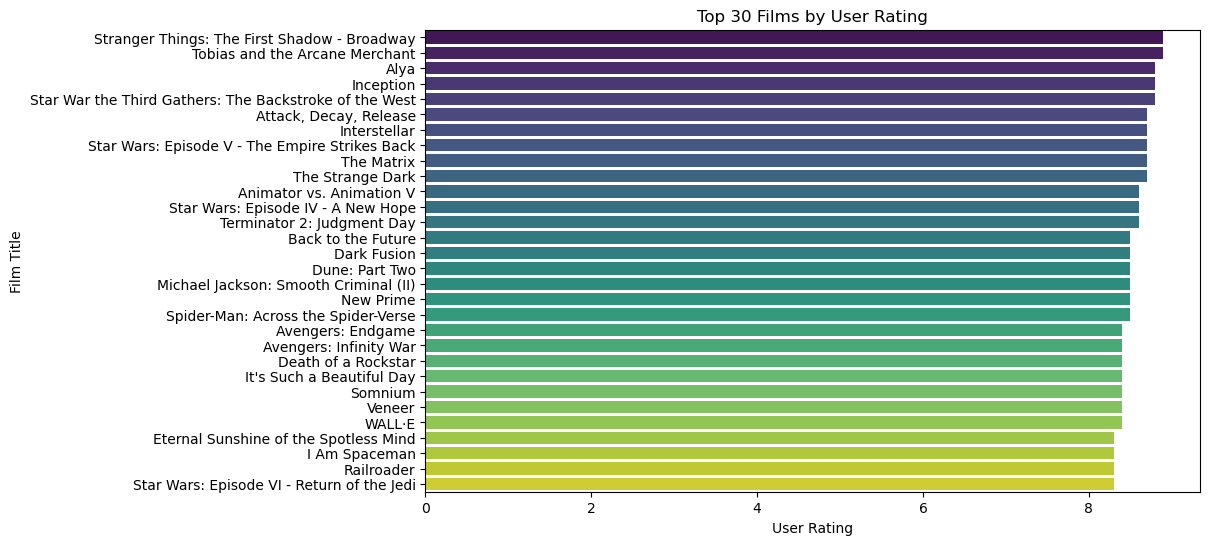

In [465]:
fig1, ax = plt.subplots(figsize=(10,6))

sns.barplot(x='User Rating', y='titles', data=top30_film_user, hue=top30_film_user['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('User Rating')
plt.ylabel('Film Title')
plt.title('Top 30 Films by User Rating')
plt.show()

In [479]:
fig1.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig1_top30_userrating.png', dpi=300, bbox_inches='tight')

##### Top 30 best films (by Critic Rating)

In [481]:
top30_film_critic = imdb_finaldt.nlargest(30, 'Critic Rating')[['titles', 'Critic Rating']]
print('Top 30 Films by Critic Rating:')
print(top30_film_critic.to_string(index=False))

Top 30 Films by Critic Rating:
                                                     titles  Critic Rating
                                      Bride of Frankenstein           95.0
                                                     WALL·E           95.0
                                 E.T. the Extra-Terrestrial           92.0
                        Invasion of the Body Snatchers 1956           92.0
                                          Frankenstein 1931           91.0
                                                        Her           91.0
                         Close Encounters of the Third Kind           90.0
                                  It's Such a Beautiful Day           90.0
                         Star Wars: Episode IV - A New Hope           90.0
                      Eternal Sunshine of the Spotless Mind           89.0
                                              Black Panther           88.0
                                               Donnie Darko          

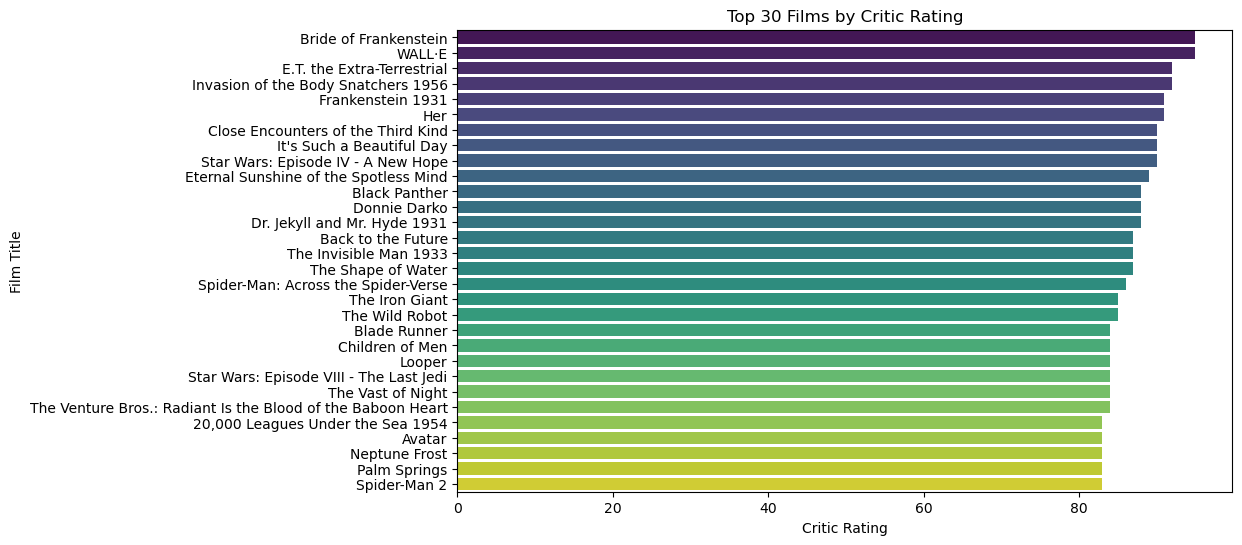

In [483]:
fig2, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Critic Rating', y='titles', data=top30_film_critic, hue=top30_film_critic['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('Critic Rating')
plt.ylabel('Film Title')
plt.title('Top 30 Films by Critic Rating')
plt.show()

In [487]:
fig2.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig2_top30_criticrating.png', dpi=300, bbox_inches='tight')

##### Diference between User Rating and Critic Rating

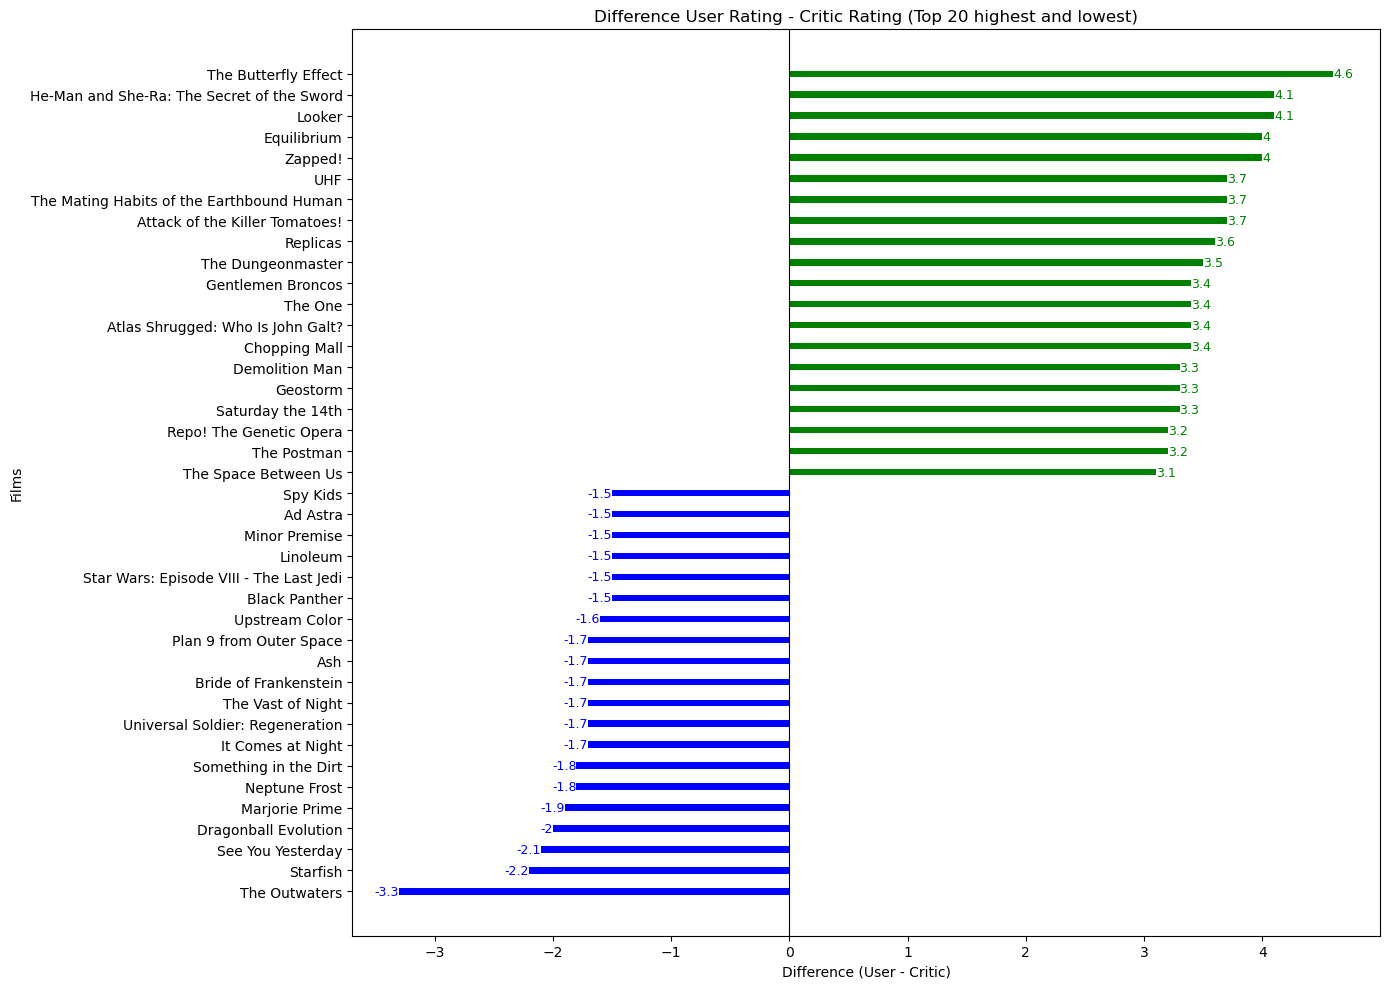

In [489]:
imdb_finaldt['diff_rating'] = imdb_finaldt['User Rating'] - imdb_finaldt['Critic Rating']/10

diff_20_larg = imdb_finaldt.nlargest(20, 'diff_rating').copy()  # 20 largest
diff_20_larg['Type'] = 'biggest'

diff_20_lowest = imdb_finaldt.nsmallest(20, 'diff_rating').copy()   # 20 lowest
diff_20_lowest['Type'] = 'lowest'


df_diff = pd.concat([diff_20_larg, diff_20_lowest])  # merging
df_diff = df_diff.sort_values('diff_rating')  # ordering

fig3, ax = plt.subplots(figsize=(14,10))
colors = df_diff['diff_rating'].apply(lambda x: 'green' if x > 0 else 'blue')
plt.barh(df_diff['titles'], df_diff['diff_rating'], color=colors, height=0.3)

for i, (val, name) in enumerate(zip(df_diff['diff_rating'], df_diff['titles'])): # adding values
    txt = f"{val:.1f}".rstrip('0').rstrip('.')     # round to only 1 decimal place
    plt.text(val, i, txt, va='center',
             ha='left' if val > 0 else 'right',
             color=colors.iloc[i], fontsize=9)


plt.title("Difference User Rating - Critic Rating (Top 20 highest and lowest)")
plt.axvline(0, color='black', linewidth=0.8)  # line on zero
plt.xlabel("Difference (User - Critic)")
plt.ylabel("Films")
plt.tight_layout()
plt.show()

In [491]:
fig3.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig3_diff_user_and_critic_rating.png', dpi=300, bbox_inches='tight')

#### Popularity

##### Top 20 most popular films

In [493]:
top20_pop = imdb_finaldt.nlargest(20, 'Popularity')[['titles','Popularity']]
print('Top 20 popular films:')
print(top20_pop.to_string(index=False))

Top 20 popular films:
                                      titles  Popularity
  Star Wars: Episode VII - The Force Awakens   1000000.0
                                 The Martian    978000.0
                              Dune: Part One    973000.0
                     Avengers: Age of Ultron    972000.0
                     Spider-Man: No Way Home    972000.0
         Captain America: The Winter Soldier    946000.0
          Captain America: The First Avenger    944000.0
                                  Iron Man 3    942000.0
                                  Spider-Man    936000.0
                                  Iron Man 2    914000.0
   Star Wars: Episode I - The Phantom Menace    903000.0
                                       Logan    901000.0
                  Captain America: Civil War    900000.0
Star Wars: Episode III - Revenge of the Sith    896000.0
                                Donnie Darko    890000.0
                               Black Panther    886000.0
         

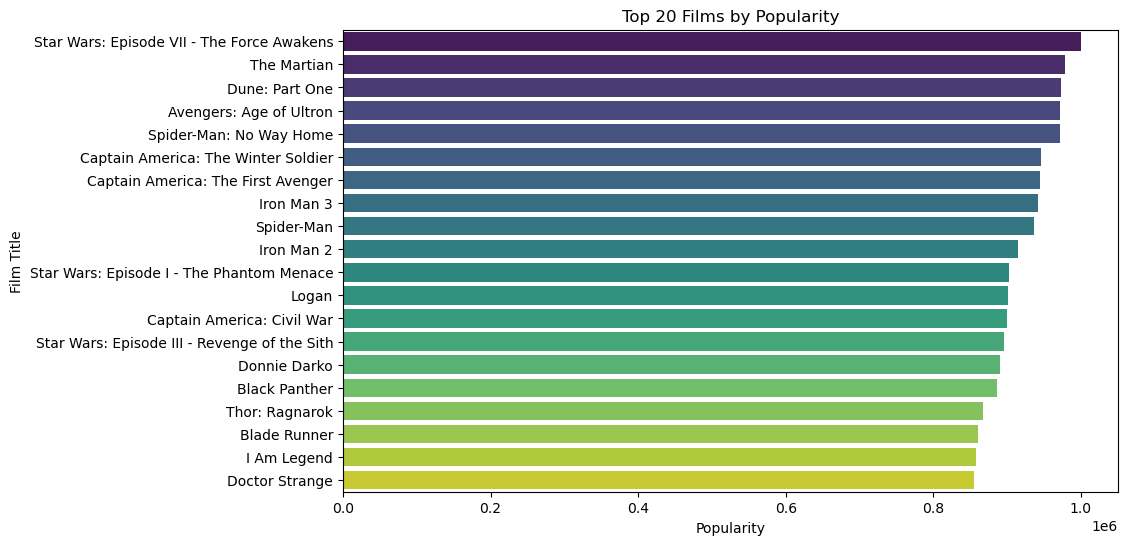

In [495]:
fig4, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Popularity', y='titles', data=top20_pop, hue=top20_pop['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('Popularity')
plt.ylabel('Film Title')
plt.title('Top 20 Films by Popularity')
plt.show()

In [497]:
fig4.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig4_top20_popular_films.png', dpi=300, bbox_inches='tight')

#### Duration

##### Top 20 longest films

In [499]:
top20_longest = imdb_finaldt.nlargest(20, 'duration')[['titles','duration']]
print('Top 20 longest films:')
print(top20_longest.to_string(index=False))

Top 20 longest films:
                                    titles  duration
Commando Cody: Sky Marshal of the Universe     361.0
                          Girl Blood Sport     354.0
                             The Power God     300.0
             The Secret of Treasure Island     300.0
               Flash Gordon's Trip to Mars     299.0
           The Green Hornet Strikes Again!     293.0
 Captain Video: Master of the Stratosphere     287.0
                       Shadow of Chinatown     281.0
                   Mysterious Doctor Satan     267.0
                        The Phantom Creeps     265.0
                          Batman and Robin     263.0
                Dick Tracy vs. Crime, Inc.     263.0
                     The Green Hornet 1940     258.0
                            Brick Bradford     257.0
                     Atom Man vs. Superman     252.0
                    Mysterious Island 1951     252.0
                              Bruce Gentry     246.0
                        

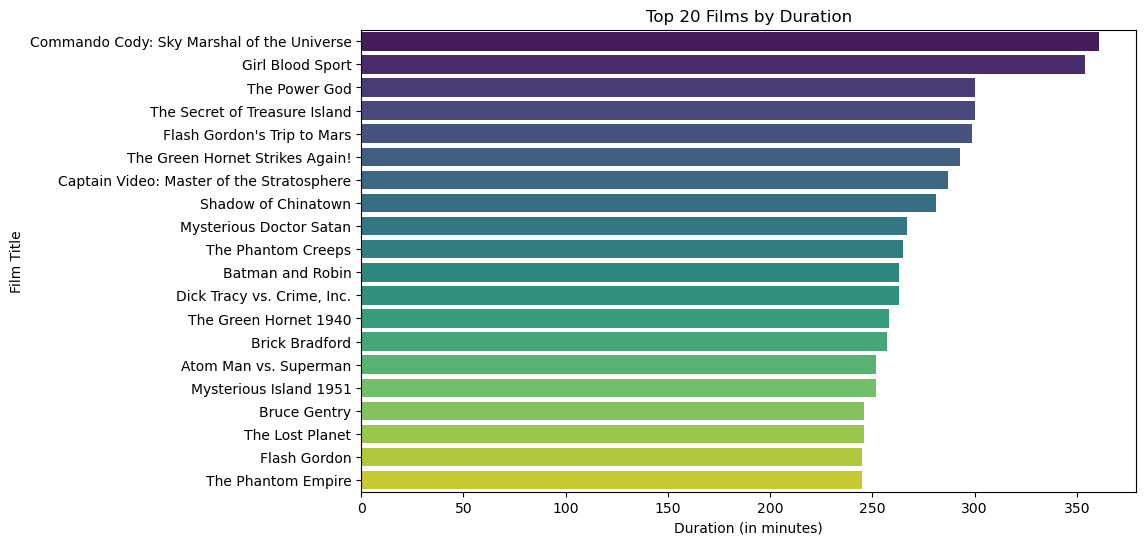

In [501]:
fig5, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='duration', y='titles', data=top20_longest, hue=top20_longest['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('Duration (in minutes)')
plt.ylabel('Film Title')
plt.title('Top 20 Films by Duration')
plt.show()

In [509]:
fig5.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig5_top20_longest_duration.png', dpi=300, bbox_inches='tight')

##### Top 20 Shorter films

In [505]:
top20_short = (imdb_finaldt[imdb_finaldt['duration'] > 0]       # out films with duration = 0 min
    .nsmallest(20, 'duration')[['titles','duration']])

print('Top 20 shorter films:')
print(top20_short.to_string(index=False))

Top 20 shorter films:
                                   titles  duration
                                 Crawlers       5.0
                      The Unknown Trilogy      26.0
        Mr. Payback: An Interactive Movie      30.0
                 Animator vs. Animation V      31.0
                                Neon Fear      40.0
               Ascension of the Demonoids      45.0
                          Batman: Anarchy      45.0
                   Escape from New Jersey      45.0
                               Fast Shark      45.0
              Fast Shark II: Faster Shark      45.0
            Fast Shark III: Fastest Shark      45.0
                  Humanoids from Atlantis      45.0
         Lego Hero Factory: Savage Planet      45.0
                    Max Steel: Team Turbo      45.0
                  Star Trek: Captain Pike      45.0
            Wolf Tracer's Dinosaur Island      45.0
                       As the Earth Turns      46.0
           Lego Marvel Avengers: Code Red 

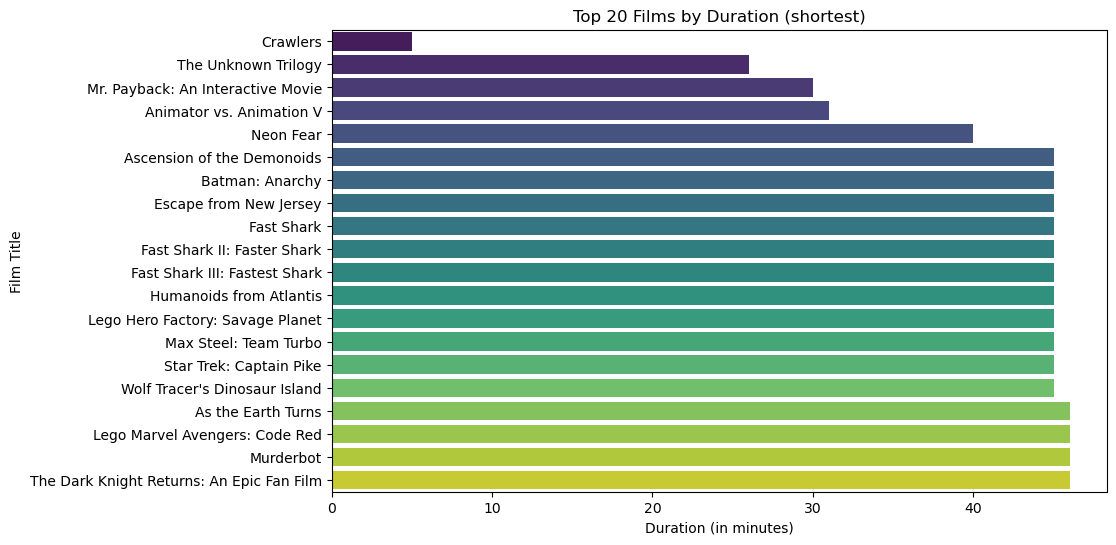

In [507]:
fig6, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='duration', y='titles', data=top20_short, hue=top20_short['titles'], palette='viridis', dodge=False, legend=False)
plt.xlabel('Duration (in minutes)')
plt.ylabel('Film Title')
plt.title('Top 20 Films by Duration (shortest)')
plt.show()

In [511]:
fig6.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig6_top20_shorter_duration.png', dpi=300, bbox_inches='tight')

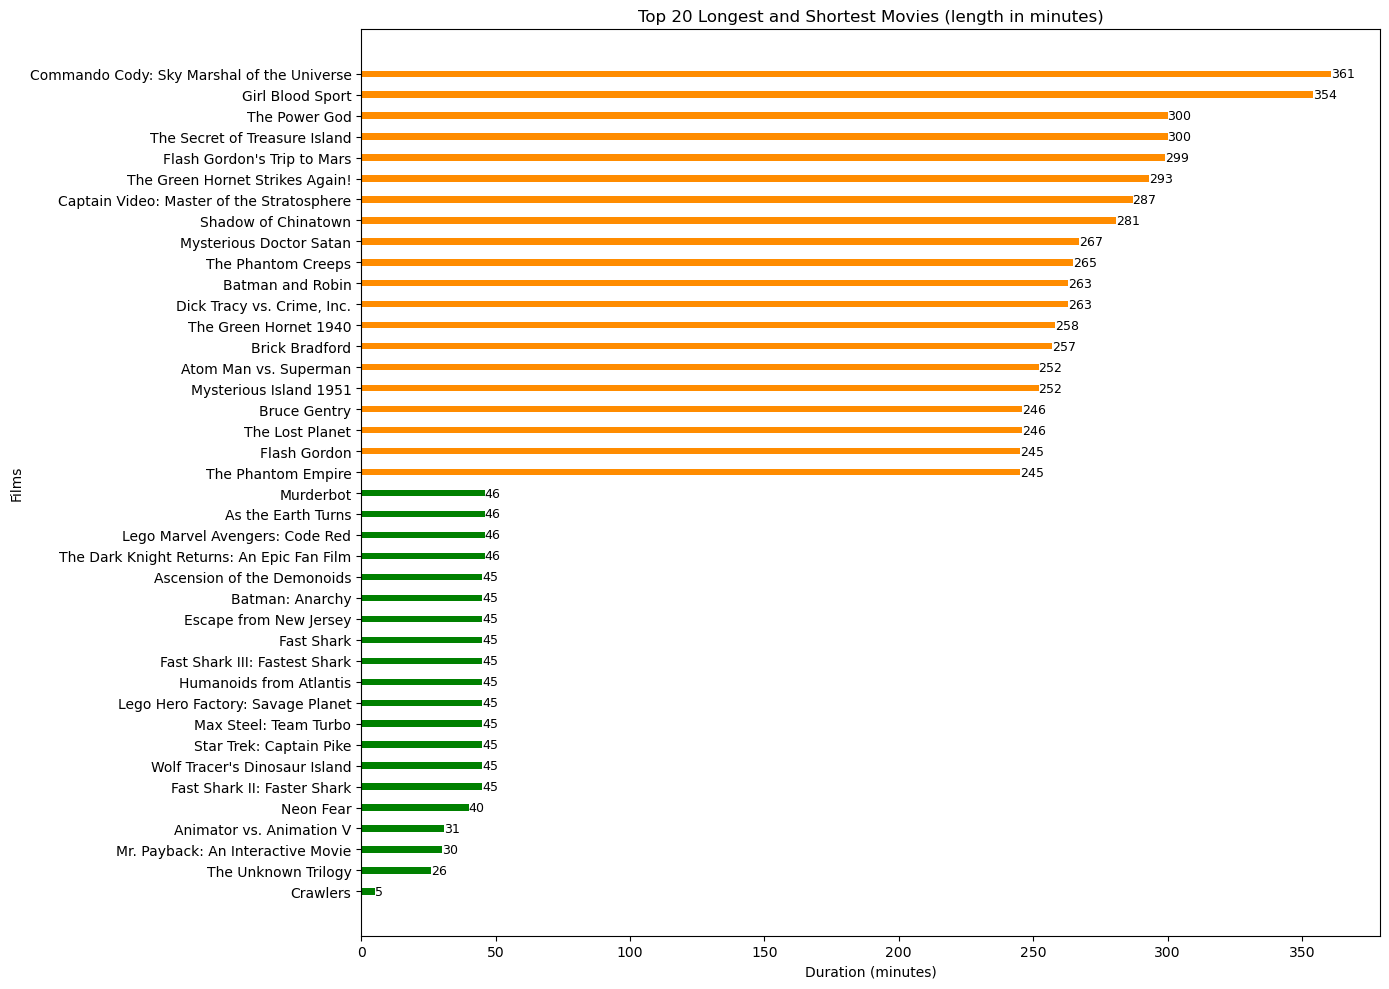

In [515]:
top20_longest['Type'] = 'longest'
top20_short['Type'] = 'shortest'

df_duration = pd.concat([top20_longest, top20_short])     # merge
df_duration = df_duration.sort_values('duration')         # ordering
colors = df_duration['Type'].map({'shortest': 'green', 'longest': 'darkorange'})   # defining colors

fig7, ax = plt.subplots(figsize=(14,10))
plt.barh(df_duration['titles'], df_duration['duration'], color=colors, height=0.3)

for i, (val, name) in enumerate(zip(df_duration['duration'], df_duration['titles'])):  # adding values
    txt = f"{val:.0f}"   # round
    plt.text(val, i, txt, va='center', ha='left', color='black', fontsize=9)

plt.title("Top 20 Longest and Shortest Movies (length in minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Films")
plt.tight_layout()
plt.show()

In [517]:
fig7.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig7_diff_duration.png', dpi=300, bbox_inches='tight')

#### Directors

##### Top 15 most productive directors

In [519]:
top15_productive = imdb_finaldt['Director'].value_counts().nlargest(15)
print(top15_productive)

Director
Mark Polonia             22
Fred Olen Ray            16
Albert Pyun              14
Spencer Gordon Bennet    14
David DeCoteau           12
Charles Band             12
Ford Beebe               11
Roger Corman             11
Bert I. Gordon           10
Robert Rodriguez         10
Christopher R. Mihm      10
Steven Spielberg          9
Phillip J. Roth           9
Donald G. Jackson         9
Jack Arnold               8
Name: count, dtype: int64


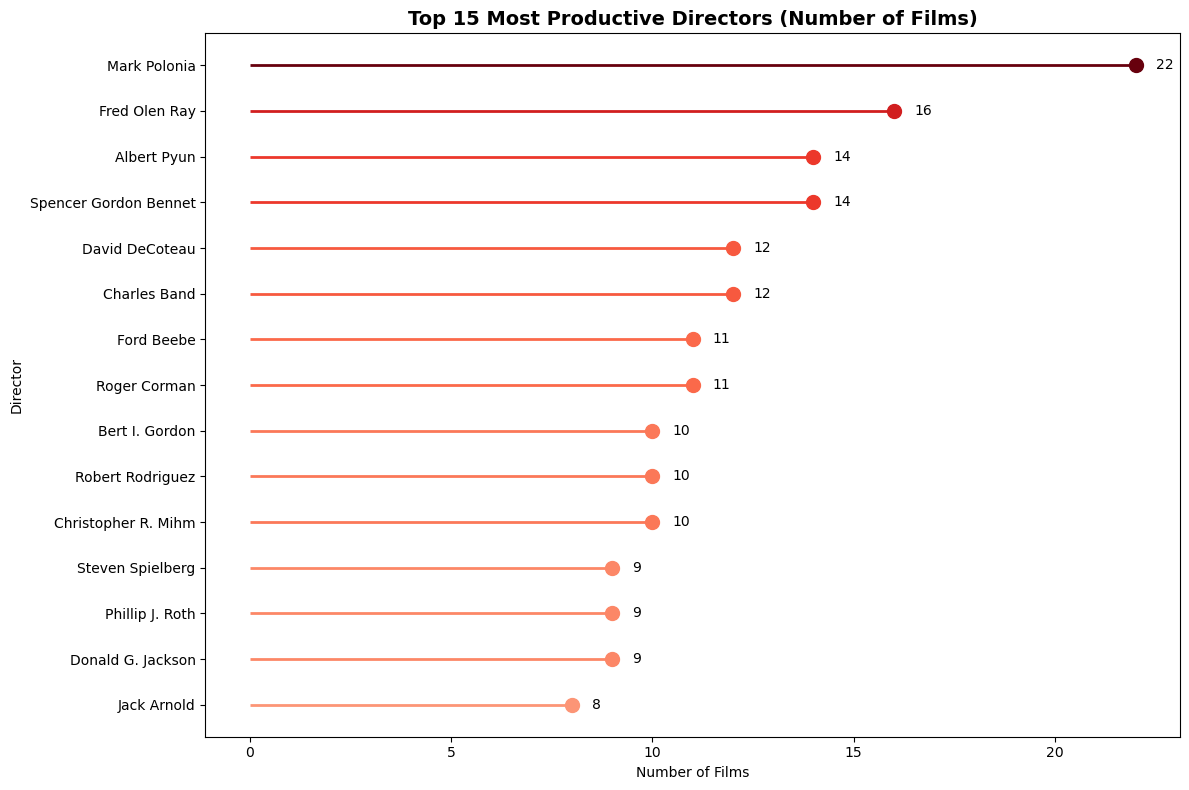

In [521]:
top15_productive = imdb_finaldt['Director'].value_counts().nlargest(15)

fig8, ax = plt.subplots(figsize=(12,8))
colors = plt.cm.Reds(top15_productive.values / top15_productive.values.max())    

for i, (director, count) in enumerate(top15_productive.items()):
    plt.hlines(y=i, xmin=0, xmax=count, color=colors[i], linewidth=2)   # linha
    plt.plot(count, i, "o", color=colors[i], markersize=10)             # bolinha
    plt.text(count + 0.5, i, str(int(count)), va="center", fontsize=10) # número

plt.yticks(range(len(top15_productive)), top15_productive.index)
plt.gca().invert_yaxis()  # mais produtivo no topo
plt.title("Top 15 Most Productive Directors (Number of Films)", fontsize=14, weight="bold")
plt.xlabel("Number of Films")
plt.ylabel("Director")
plt.tight_layout()
plt.show()

In [523]:
fig8.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig8_top15_productive_directors.png', dpi=300, bbox_inches='tight')

#### Production Companies

##### Top 15 most productiver Production Companies

Includes both films produced by the producer alone and films produced in conjunction with other producers.

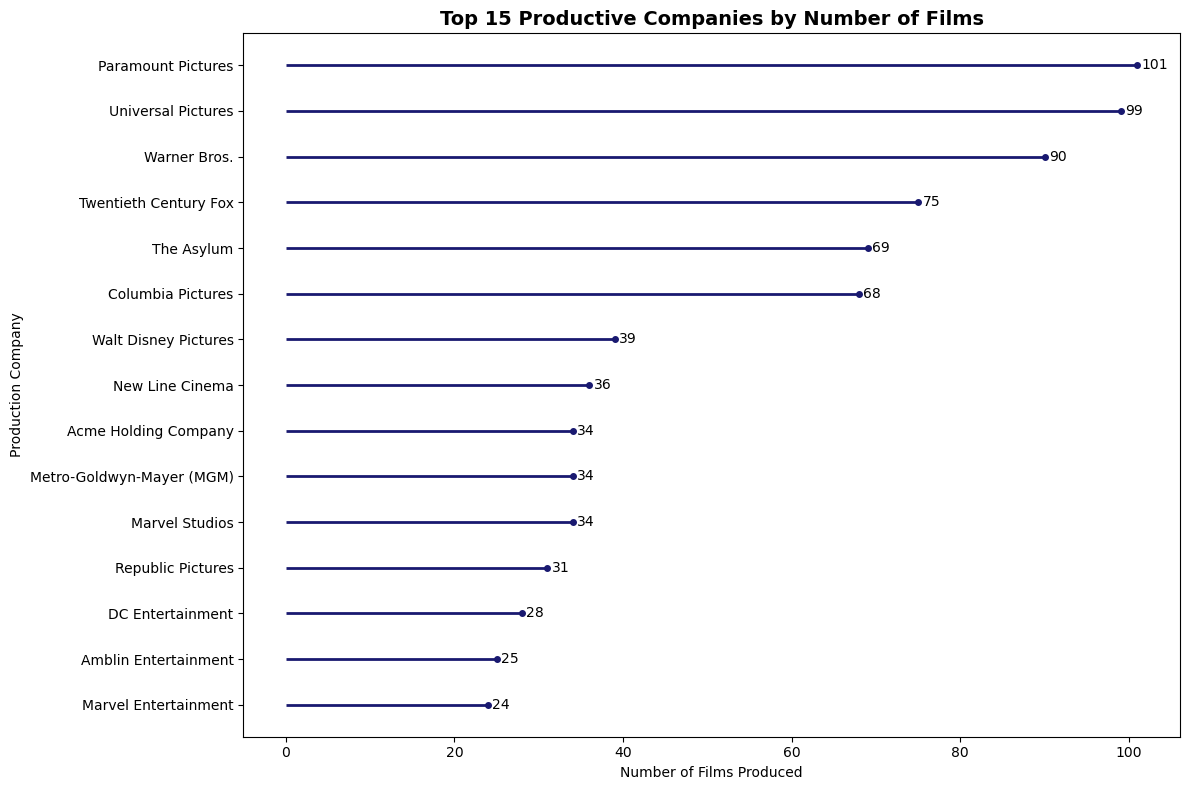

In [525]:
top15_producers = producers_count.head(15)        # producers_count is defined abpve

fig9, ax = plt.subplots(figsize=(12,8))
colors = 'midnightblue' 

for i, (producer, count) in enumerate(top15_producers.items()):
    plt.hlines(y=i, xmin=0, xmax=count, color=colors, linewidth=2)   
    plt.plot(count, i, "o", color=colors, markersize=4)             
    plt.text(count + 0.5, i, str(int(count)), va="center", fontsize=10) 

plt.yticks(range(len(top15_producers)), top15_producers.index)
plt.gca().invert_yaxis()  # mais frequente no topo
plt.title("Top 15 Productive Companies by Number of Films", fontsize=14, weight="bold")
plt.xlabel("Number of Films Produced")
plt.ylabel("Production Company")
plt.tight_layout()
plt.show()

In [527]:
fig9.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig9_top15_productive_companies.png', dpi=300, bbox_inches='tight')

#### Genres

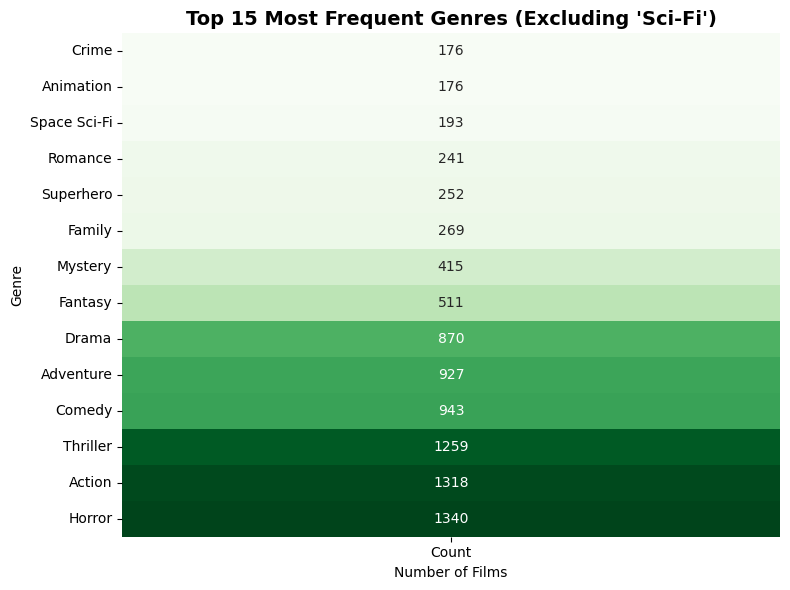

In [531]:
top15_gen = count_gen.most_common(15)
top15_gen = [(g, c) for g, c in top15_gen if g != 'Sci-Fi']

df_gen = pd.DataFrame(top15_gen, columns=['Genre', 'Count'])
df_gen = df_gen.sort_values('Count', ascending=True)  

fig10, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_gen[['Count']], annot=True, fmt="d", cmap="Greens", yticklabels=df_gen['Genre'], cbar=False)
plt.title("Top 15 Most Frequent Genres (Excluding 'Sci-Fi')", fontsize=14, weight="bold")
plt.xlabel("Number of Films")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

In [533]:
fig10.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig10_top15_frequent_genres.png', dpi=300, bbox_inches='tight')

### Multivariate Analysis

##### Relationship Genres Rating and User Rating

C:\Users\KAWAN\AppData\Local\Temp\ipykernel_11376\1103997362.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y='User Rating', data=df_top15_genres_user, palette='magma')


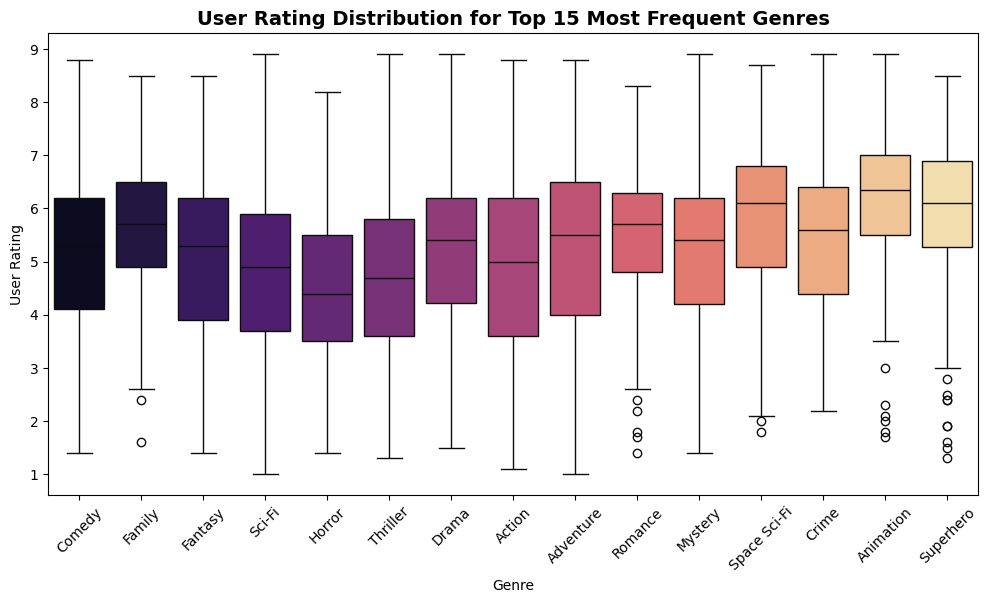

In [535]:
# "Explode" the genres in various lines
all_genres = imdb_finaldt['Genres'].str.split(', ').explode()

df_genres_user = pd.DataFrame({'Genre': all_genres, 'User Rating': imdb_finaldt.loc[all_genres.index, 'User Rating']})

top15_genres_user = df_genres_user['Genre'].value_counts().nlargest(15).index
df_top15_genres_user = df_genres_user[df_genres_user['Genre'].isin(top15_genres_user)]

fig11, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='Genre', y='User Rating', data=df_top15_genres_user, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('User Rating')
plt.title('User Rating Distribution for Top 15 Most Frequent Genres', fontsize=14, fontweight='bold')
plt.show()

In [537]:
fig11.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig11_userrating_top15_frequent_genres.png', dpi=300, bbox_inches='tight')

##### Relationship Genres Rating and Critic Rating

C:\Users\KAWAN\AppData\Local\Temp\ipykernel_11376\2295460521.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Genre', y=df_top15_genres_critic['Critic Rating']/10, data=df_top15_genres_critic, palette='magma')


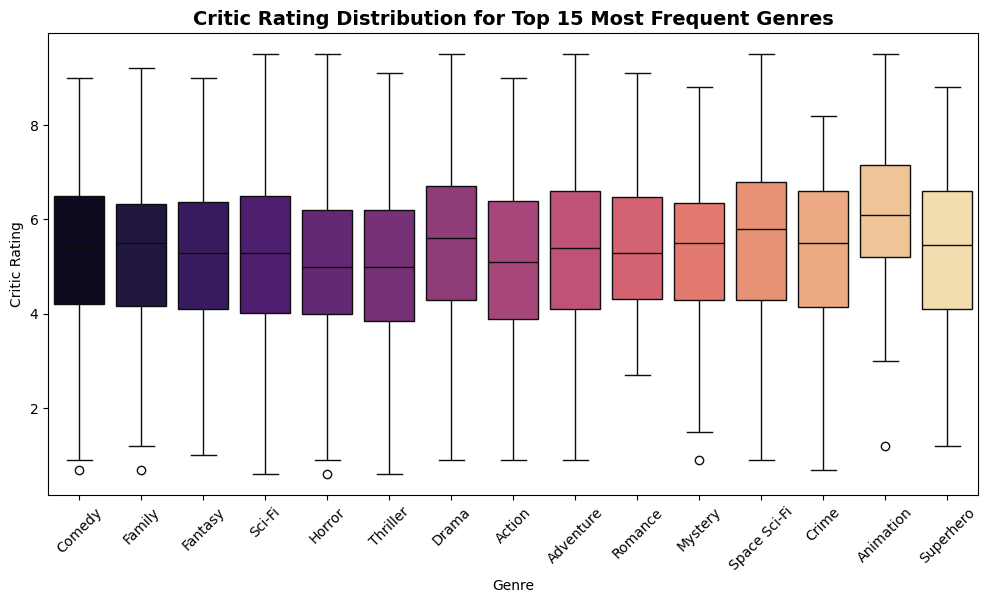

In [542]:
all_genres2 = imdb_finaldt['Genres'].str.split(', ').explode().reset_index(drop=True)

critic_ratings_exploded = imdb_finaldt['Critic Rating'].repeat(imdb_finaldt['Genres'].str.count(',') + 1).reset_index(drop=True)

df_genres_critic = pd.DataFrame({'Genre': all_genres2, 'Critic Rating': critic_ratings_exploded})
top15_genres_critic = df_genres_critic['Genre'].value_counts().nlargest(15).index
df_top15_genres_critic = df_genres_critic[df_genres_critic['Genre'].isin(top15_genres_critic)]

fig12, ax=plt.subplots(figsize=(12,6))
sns.boxplot(x='Genre', y=df_top15_genres_critic['Critic Rating']/10, data=df_top15_genres_critic, palette='magma')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Critic Rating')
plt.title('Critic Rating Distribution for Top 15 Most Frequent Genres', fontsize=14, fontweight='bold')
plt.show()

In [544]:
fig12.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig12_criticrating_top15_frequent_genres.png', dpi=300, bbox_inches='tight')

##### Relationship between genre and popularity

C:\Users\KAWAN\AppData\Local\Temp\ipykernel_11376\3919771970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


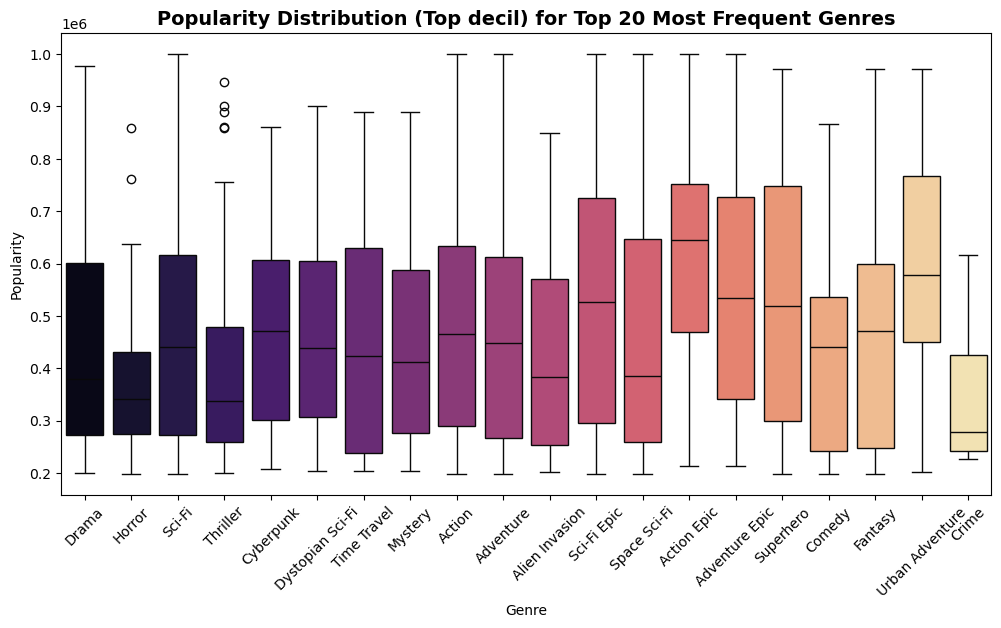

In [549]:
q10 = df_genres_pop['Popularity'].quantile(0.9)
df_genres_pop_q10 = df_genres_pop[df_genres_pop['Popularity'] > q10]       # above the 90th decil

top20_genres_pop_q10 = df_genres_pop_q10['Genre'].value_counts().nlargest(20).index
df_top20_genres_pop_q10 = df_genres_pop_q10[df_genres_pop_q10['Genre'].isin(top20_genres_pop_q10)]

fig13, ax = plt.subplots(figsize=(12,6))
sns.boxplot(
    x='Genre', 
    y='Popularity', 
    data=df_top20_genres_pop_q10, 
    palette='magma'
)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Popularity Distribution (Top decil) for Top 20 Most Frequent Genres', fontsize=14, fontweight='bold')
plt.show()

In [551]:
fig13.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig13_popularity_top15_frequent_genres.png', dpi=300, bbox_inches='tight')

##### Relationship between Popularity and Critic and User Rating

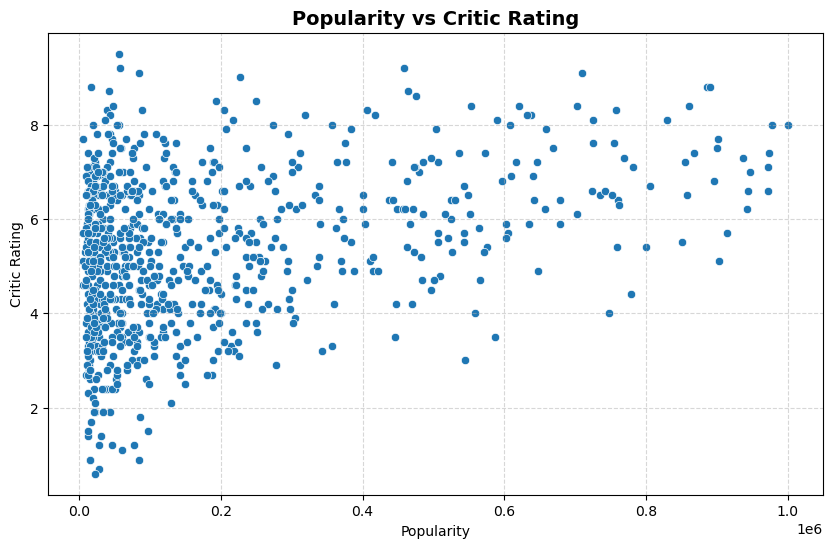

In [555]:
df_filtered = imdb_finaldt[(imdb_finaldt['Critic Rating'] > 0) & (imdb_finaldt['Popularity'] > 5000)]

fig14, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='Popularity', y=df_filtered['Critic Rating'] / 10, data=df_filtered)

plt.xlabel('Popularity')
plt.ylabel('Critic Rating')
plt.title('Popularity vs Critic Rating', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [557]:
fig14.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig14_popularity_x_criticrating.png', dpi=300, bbox_inches='tight')

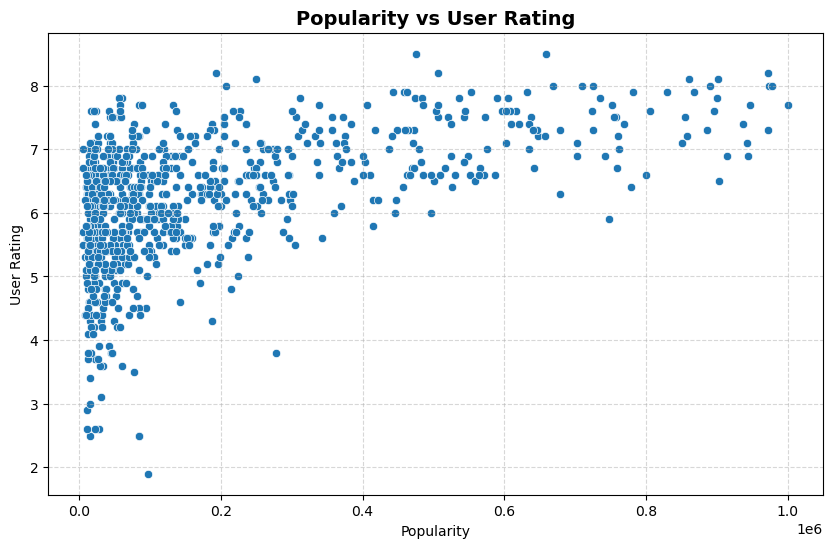

In [559]:
fig15, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='Popularity', y=df_filtered['User Rating'], data=df_filtered)

plt.xlabel('Popularity')
plt.ylabel('User Rating')
plt.title('Popularity vs User Rating', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [561]:
fig15.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig15_popularity_x_userrating.png', dpi=300, bbox_inches='tight')

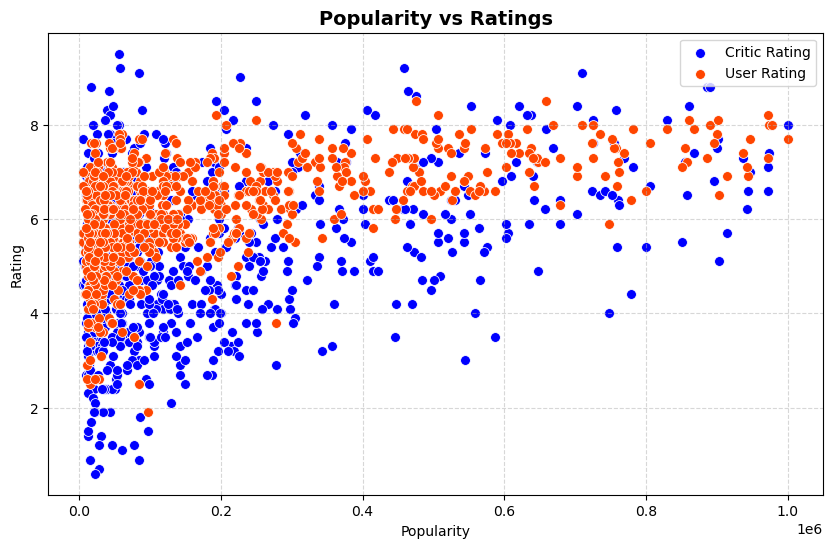

In [563]:
fig16, ax = plt.subplots(figsize=(10,6))

# Critic Rating
sns.scatterplot(x='Popularity', y=df_filtered['Critic Rating'] / 10, data=df_filtered, label='Critic Rating', color='blue', s=50)
# User Rating
sns.scatterplot(x='Popularity', y=df_filtered['User Rating'], data=df_filtered, label='User Rating', color='orangered', s=50)

plt.xlabel('Popularity')
plt.ylabel('Rating')
plt.title('Popularity vs Ratings', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [565]:
fig16.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig16_popularity_ratings.png', dpi=300, bbox_inches='tight')

##### Relationship between productive directors and User and Critic Ratings of their films

I took the most productive because there is more variation. I didnt include the plot for Critic Rating because theres a lot of nan, at least related to these authors

C:\Users\KAWAN\AppData\Local\Temp\ipykernel_11376\1906723117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Director', y='User Rating', data=df_top15_prod, order=top15_productive2, palette='plasma')


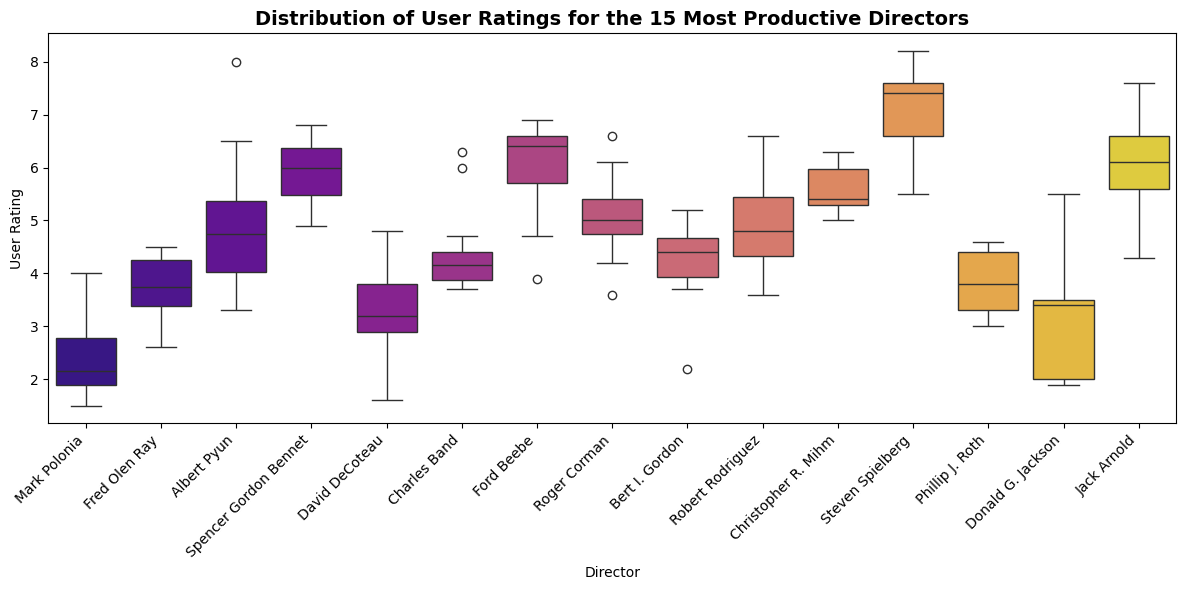

In [567]:
top15_productive2 = (imdb_finaldt['Director'].value_counts().nlargest(15).index)
df_top15_prod = imdb_finaldt[imdb_finaldt['Director'].isin(top15_productive2)]

fig17, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='Director', y='User Rating', data=df_top15_prod, order=top15_productive2, palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Director')
plt.ylabel('User Rating')
plt.title('Distribution of User Ratings for the 15 Most Productive Directors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [569]:
fig17.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig17_userrating_top15_productive_directors.png', dpi=300, bbox_inches='tight')

##### Relationship between popular production companies and User and Critic Ratings of their films

C:\Users\KAWAN\AppData\Local\Temp\ipykernel_11376\4249505831.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Production Companies',y='User Rating', data=df_top15_producers, order=top15_producers, palette='coolwarm')


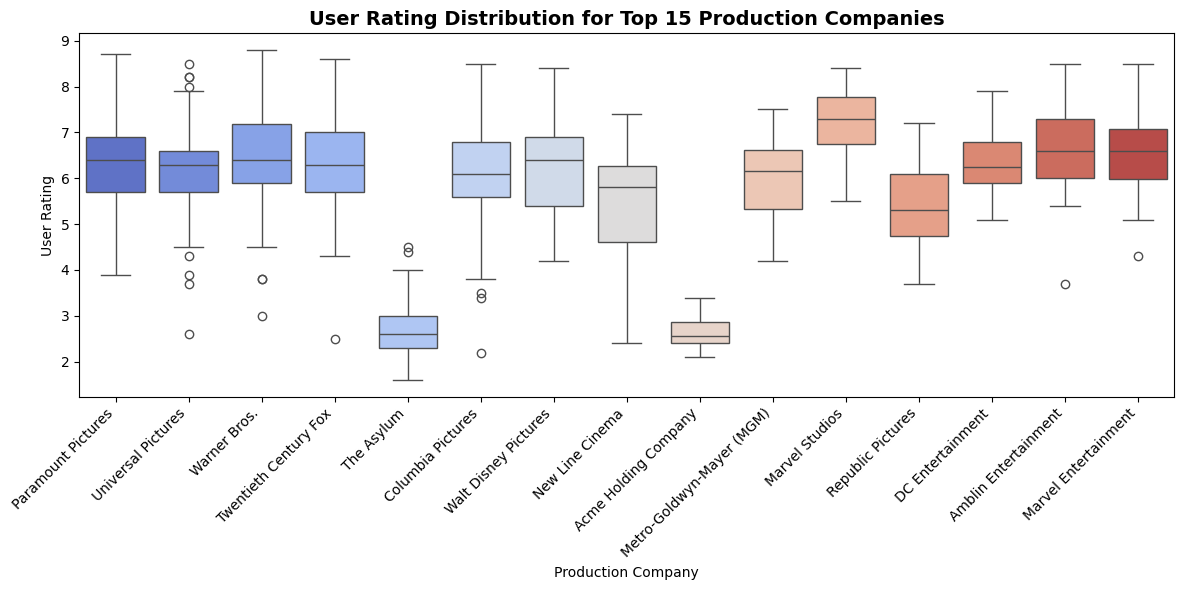

In [571]:
import ast

imdb_finaldt['Production Companies'] = imdb_finaldt['Production Companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
all_producers = imdb_finaldt.explode('Production Companies')
df_prod_valid = all_producers[(all_producers['User Rating'] > 0) & (all_producers['Production Companies'].notna())]
top15_producers = df_prod_valid['Production Companies'].value_counts().nlargest(15).index
df_top15_producers = df_prod_valid[df_prod_valid['Production Companies'].isin(top15_producers)]

fig18, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='Production Companies',y='User Rating', data=df_top15_producers, order=top15_producers, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Production Company')
plt.ylabel('User Rating')
plt.title('User Rating Distribution for Top 15 Production Companies', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [573]:
fig18.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig18_userrating_top15_productive_companies.png', dpi=300, bbox_inches='tight')

C:\Users\KAWAN\AppData\Local\Temp\ipykernel_11376\933532027.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Production Companies', y=df_top15_producers_critic['Critic Rating']/10, data=df_top15_producers_critic,


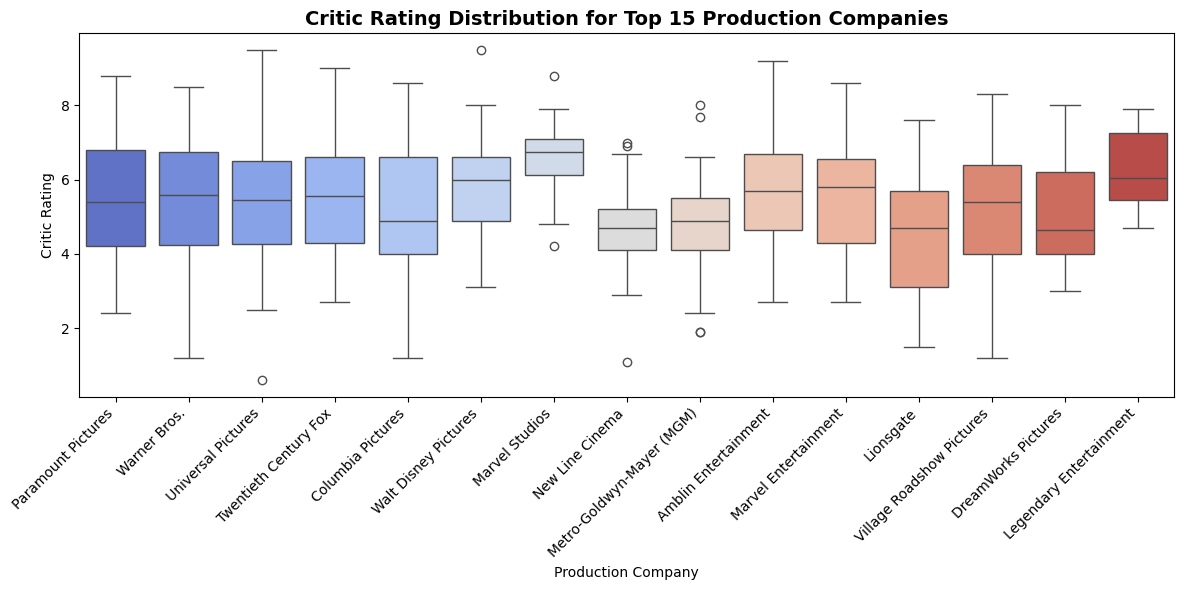

In [577]:
import ast

imdb_finaldt['Production Companies'] = imdb_finaldt['Production Companies'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_producers_exploded = imdb_finaldt.explode('Production Companies')
df_producers_valid_critic = df_producers_exploded[(df_producers_exploded['Critic Rating'] > 0) & (df_producers_exploded['Production Companies'].notna())]

top15_producers_critic = df_producers_valid_critic['Production Companies'].value_counts().nlargest(15).index
df_top15_producers_critic = df_producers_valid_critic[
    df_producers_valid_critic['Production Companies'].isin(top15_producers_critic)]

fig19, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x='Production Companies', y=df_top15_producers_critic['Critic Rating']/10, data=df_top15_producers_critic, 
            order=top15_producers_critic, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Production Company')
plt.ylabel('Critic Rating')
plt.title('Critic Rating Distribution for Top 15 Production Companies', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [579]:
fig19.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig19_criticrating_top15_productive_companies.png', dpi=300, bbox_inches='tight')

##### Evolution of the number of films produced per year by genre, from 1990

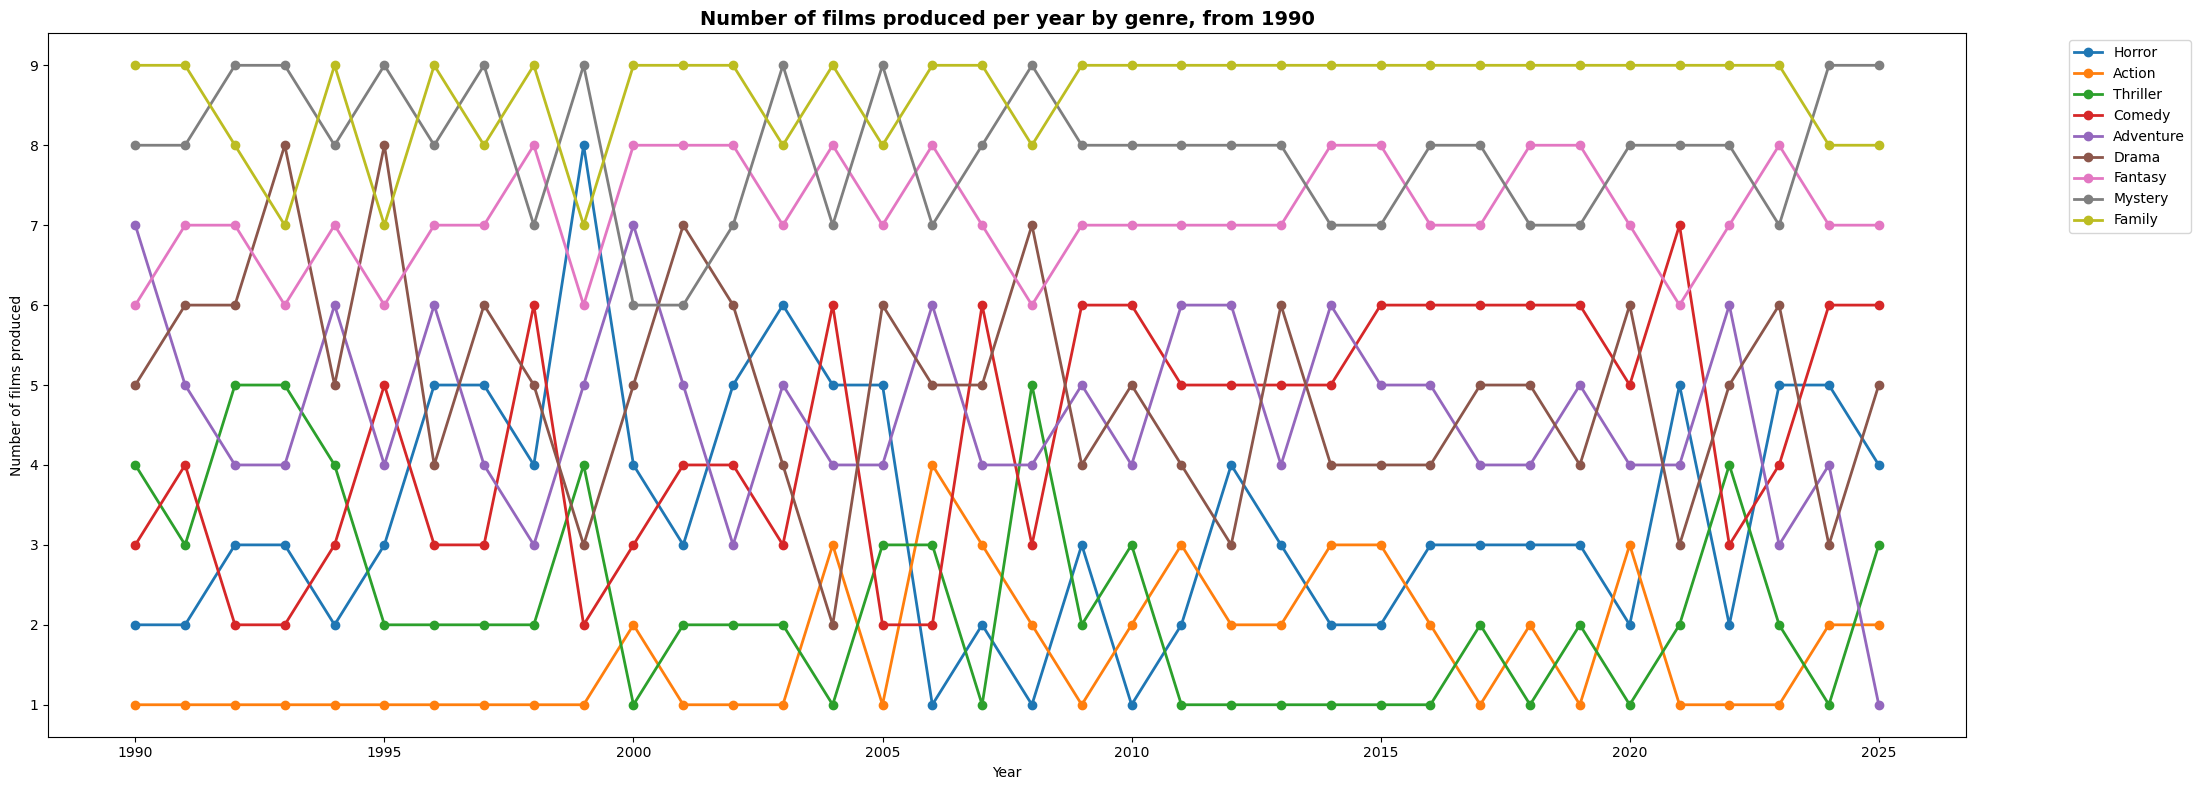

In [588]:
all_genres = imdb_finaldt['Genres'].str.split(', ').explode().reset_index(drop=True)
years_exploded = imdb_finaldt['Year'].repeat(imdb_finaldt['Genres'].str.count(',') + 1).reset_index(drop=True)

df_genres_year = pd.DataFrame({'Genre': all_genres,'Year': years_exploded})

top15_genres = df_genres_year['Genre'].value_counts().nlargest(10).index   # 10 most frequent genres
top15_genres = top15_genres.drop("Sci-Fi")   # remove sci fi

df_top15 = df_genres_year[df_genres_year['Genre'].isin(top15_genres)]
df_top15 = df_top15[df_top15['Year'] >= 1990]           # from 1990
genre_year_counts = (df_top15.groupby(['Year','Genre']).size().reset_index(name='Count'))  # number of films by year and gente
genre_year_counts['Rank'] = genre_year_counts.groupby('Year')['Count'] \
    .rank(method='first', ascending=False)
genre_year_counts = genre_year_counts[genre_year_counts['Rank'] <= 10]


fig20, ax = plt.subplots(figsize=(22,8))

for genre in top15_genres:
    data = genre_year_counts[genre_year_counts['Genre'] == genre]
    plt.plot(data['Year'], data['Rank'], marker='o', label=genre, linewidth=2)

plt.xlabel("Year")
plt.ylabel("Number of films produced")
plt.title("Number of films produced per year by genre, from 1990", fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [590]:
fig20.savefig('C:/Users/KAWAN/Desktop/aulas_python_pimes/plots_imdb/fig20_number_of_films_year.png', dpi=300, bbox_inches='tight')